In [123]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 

warnings.filterwarnings('ignore')

df=pd.read_csv('train.csv')

df.columns
df.shape
print(df.isnull().sum())


PolicySubmissiondate         0
PolicyID                     0
Type Of Policy               3
SBU                          0
Inceptiondate                0
Expirydate                   0
TIEUPNUMBER                  0
Sum Insured                  1
PINCODE                      0
STATE                        1
Manufacturer                 3
NET PREMIUM PAYABLE          0
NCB                        348
NCB AMOUNT                 378
COVERAGE_DEP-ODPremium    4483
OD Premium                   1
TP PREMIUM                1524
IDV                          0
Policy Term                  3
Carrying Capacity            0
Cubic Capacity               0
Inceptionyr                  0
Endorsement                  0
Engine-Chassis               0
Claim Count               6822
Claim Cost                6822
Vehicle Age                  0
target                       0
dtype: int64


for the interpretation of data:
there are various null values in the data. so in the type of policy in slots for null data we can type either the customer hasnt purchased the policy or the policy details are unknown. for the sum issued we can write zzero since we dont know the sum which is issued in the data. The state also can be mentioned ignore. The manufacturer can be declared unknown for blank data. the ncb percentage can be mentioned as unknown or not valid whereas the ncb amount can be written zero. claim count and claim cost can be mentioned zero. od and tp premium can be declared unknown. similar thing can be applied for policy term 

In [124]:
df['Policy Term'].value_counts()

Policy Term
1.0    6962
3.0      19
2.0      16
Name: count, dtype: int64

In [125]:
df.describe()

,Sum Insured,PINCODE,NET PREMIUM PAYABLE,NCB,NCB AMOUNT,COVERAGE_DEP-ODPremium,OD Premium,TP PREMIUM,IDV,Policy Term,Carrying Capacity,Cubic Capacity,Inceptionyr,Endorsement,Claim Count,Claim Cost,Vehicle Age,target
count,6.999000e+03,7000.000000,7000.000000,6652.000000,6622.000000,2517.000000,6999.000000,5476.000000,7.000000e+03,6997.000000,7000.000000,7000.000000,7000.0,7000.0,178.000000,178.000000,7000.000000,7000.00000
mean,3.379537e+04,427046.583000,1394.691970,39.530968,-129.031063,165.604982,375.813326,795.941928,3.371675e+04,1.007718,2.000429,128.399857,2022.0,1.0,1.101124,8124.696067,9.996429,0.70000
std,3.505310e+04,183228.598761,844.447269,12.409568,111.315838,133.774260,571.739623,171.136348,3.480484e+04,0.114415,0.035857,57.903605,0.0,0.0,0.337654,7519.016599,3.716656,0.45829
min,1.400000e+03,110001.000000,52.930000,0.000000,-2549.150000,45.200000,12.860000,0.000000,1.400000e+03,1.000000,2.000000,1.000000,2022.0,1.0,1.000000,0.000000,4.000000,0.00000
25%,1.800000e+04,360001.000000,1080.105000,25.000000,-152.150000,112.500000,185.420000,752.000000,1.800000e+04,1.000000,2.000000,109.000000,2022.0,1.0,1.000000,3227.382500,7.000000,0.00000
50%,2.691000e+04,414001.500000,1420.600000,45.000000,-110.880000,134.400000,288.320000,752.000000,2.690000e+04,1.000000,2.000000,110.000000,2022.0,1.0,1.000000,6068.340000,9.000000,1.00000
75%,4.090000e+04,574241.000000,1594.010000,50.000000,-72.070000,173.250000,432.960000,752.000000,4.078275e+04,1.000000,2.000000,125.000000,2022.0,1.0,1.000000,10197.750000,12.000000,1.00000
max,1.800000e+06,854330.000000,45541.960000,55.000000,-5.790000,3420.000000,35174.880000,2323.000000,1.800000e+06,3.000000,5.000000,999.000000,2022.0,1.0,3.000000,47903.000000,34.000000,1.00000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PolicySubmissiondate    7000 non-null   object 
 1   PolicyID                7000 non-null   object 
 2   Type Of Policy          6997 non-null   object 
 3   SBU                     7000 non-null   object 
 4   Inceptiondate           7000 non-null   object 
 5   Expirydate              7000 non-null   object 
 6   TIEUPNUMBER             7000 non-null   object 
 7   Sum Insured             6999 non-null   float64
 8   PINCODE                 7000 non-null   float64
 9   STATE                   6999 non-null   object 
 10  Manufacturer            6997 non-null   object 
 11  NET PREMIUM PAYABLE     7000 non-null   float64
 12  NCB                     6652 non-null   float64
 13  NCB AMOUNT              6622 non-null   float64
 14  COVERAGE_DEP-ODPremium  2517 non-null   

In [127]:
df.dtypes

PolicySubmissiondate       object
PolicyID                   object
Type Of Policy             object
SBU                        object
Inceptiondate              object
Expirydate                 object
TIEUPNUMBER                object
Sum Insured               float64
PINCODE                   float64
STATE                      object
Manufacturer               object
NET PREMIUM PAYABLE       float64
NCB                       float64
NCB AMOUNT                float64
COVERAGE_DEP-ODPremium    float64
OD Premium                float64
TP PREMIUM                float64
IDV                       float64
Policy Term               float64
Carrying Capacity         float64
Cubic Capacity            float64
Inceptionyr                 int64
Endorsement                 int64
Engine-Chassis             object
Claim Count               float64
Claim Cost                float64
Vehicle Age               float64
target                      int64
dtype: object

In [128]:
df['Claim Count'].fillna(0, inplace=True)

In [129]:
print(df.isnull().sum())

PolicySubmissiondate         0
PolicyID                     0
Type Of Policy               3
SBU                          0
Inceptiondate                0
Expirydate                   0
TIEUPNUMBER                  0
Sum Insured                  1
PINCODE                      0
STATE                        1
Manufacturer                 3
NET PREMIUM PAYABLE          0
NCB                        348
NCB AMOUNT                 378
COVERAGE_DEP-ODPremium    4483
OD Premium                   1
TP PREMIUM                1524
IDV                          0
Policy Term                  3
Carrying Capacity            0
Cubic Capacity               0
Inceptionyr                  0
Endorsement                  0
Engine-Chassis               0
Claim Count                  0
Claim Cost                6822
Vehicle Age                  0
target                       0
dtype: int64


In [130]:
df['Claim Cost'].fillna(0, inplace=True)

In [131]:
df.isna().sum()

PolicySubmissiondate         0
PolicyID                     0
Type Of Policy               3
SBU                          0
Inceptiondate                0
Expirydate                   0
TIEUPNUMBER                  0
Sum Insured                  1
PINCODE                      0
STATE                        1
Manufacturer                 3
NET PREMIUM PAYABLE          0
NCB                        348
NCB AMOUNT                 378
COVERAGE_DEP-ODPremium    4483
OD Premium                   1
TP PREMIUM                1524
IDV                          0
Policy Term                  3
Carrying Capacity            0
Cubic Capacity               0
Inceptionyr                  0
Endorsement                  0
Engine-Chassis               0
Claim Count                  0
Claim Cost                   0
Vehicle Age                  0
target                       0
dtype: int64

In [132]:
df['NCB']

0       20.0
1       50.0
2       45.0
3       50.0
4       45.0
        ... 
6995    25.0
6996    50.0
6997    50.0
6998    20.0
6999    20.0
Name: NCB, Length: 7000, dtype: float64

In [133]:
df.isna().sum()

PolicySubmissiondate         0
PolicyID                     0
Type Of Policy               3
SBU                          0
Inceptiondate                0
Expirydate                   0
TIEUPNUMBER                  0
Sum Insured                  1
PINCODE                      0
STATE                        1
Manufacturer                 3
NET PREMIUM PAYABLE          0
NCB                        348
NCB AMOUNT                 378
COVERAGE_DEP-ODPremium    4483
OD Premium                   1
TP PREMIUM                1524
IDV                          0
Policy Term                  3
Carrying Capacity            0
Cubic Capacity               0
Inceptionyr                  0
Endorsement                  0
Engine-Chassis               0
Claim Count                  0
Claim Cost                   0
Vehicle Age                  0
target                       0
dtype: int64

In [134]:
# df[['NET PREMIUM PAYABLE', 'NCB AMOUNT','COVERAGE_DEP-ODPremium','OD Premium','TP PREMIUM']].fillna(df[['NET PREMIUM PAYABLE', 'NCB AMOUNT','COVERAGE_DEP-ODPremium','OD Premium','TP PREMIUM']].mean(), inplace=True)
# df.isna().sum()

cols = ['NET PREMIUM PAYABLE', 'NCB AMOUNT','COVERAGE_DEP-ODPremium','OD Premium','TP PREMIUM']

for col in cols:
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)

df.isna().sum()

PolicySubmissiondate        0
PolicyID                    0
Type Of Policy              3
SBU                         0
Inceptiondate               0
Expirydate                  0
TIEUPNUMBER                 0
Sum Insured                 1
PINCODE                     0
STATE                       1
Manufacturer                3
NET PREMIUM PAYABLE         0
NCB                       348
NCB AMOUNT                  0
COVERAGE_DEP-ODPremium      0
OD Premium                  0
TP PREMIUM                  0
IDV                         0
Policy Term                 3
Carrying Capacity           0
Cubic Capacity              0
Inceptionyr                 0
Endorsement                 0
Engine-Chassis              0
Claim Count                 0
Claim Cost                  0
Vehicle Age                 0
target                      0
dtype: int64

In [135]:
print(df.isnull().sum())

PolicySubmissiondate        0
PolicyID                    0
Type Of Policy              3
SBU                         0
Inceptiondate               0
Expirydate                  0
TIEUPNUMBER                 0
Sum Insured                 1
PINCODE                     0
STATE                       1
Manufacturer                3
NET PREMIUM PAYABLE         0
NCB                       348
NCB AMOUNT                  0
COVERAGE_DEP-ODPremium      0
OD Premium                  0
TP PREMIUM                  0
IDV                         0
Policy Term                 3
Carrying Capacity           0
Cubic Capacity              0
Inceptionyr                 0
Endorsement                 0
Engine-Chassis              0
Claim Count                 0
Claim Cost                  0
Vehicle Age                 0
target                      0
dtype: int64


In [136]:
df['Policy Term'].fillna(1, inplace=True)

In [137]:
print(df.isnull().sum())

PolicySubmissiondate        0
PolicyID                    0
Type Of Policy              3
SBU                         0
Inceptiondate               0
Expirydate                  0
TIEUPNUMBER                 0
Sum Insured                 1
PINCODE                     0
STATE                       1
Manufacturer                3
NET PREMIUM PAYABLE         0
NCB                       348
NCB AMOUNT                  0
COVERAGE_DEP-ODPremium      0
OD Premium                  0
TP PREMIUM                  0
IDV                         0
Policy Term                 0
Carrying Capacity           0
Cubic Capacity              0
Inceptionyr                 0
Endorsement                 0
Engine-Chassis              0
Claim Count                 0
Claim Cost                  0
Vehicle Age                 0
target                      0
dtype: int64


In [138]:
df['Sum Insured'].fillna(0, inplace=True)

In [139]:
print(df.isnull().sum())

PolicySubmissiondate        0
PolicyID                    0
Type Of Policy              3
SBU                         0
Inceptiondate               0
Expirydate                  0
TIEUPNUMBER                 0
Sum Insured                 0
PINCODE                     0
STATE                       1
Manufacturer                3
NET PREMIUM PAYABLE         0
NCB                       348
NCB AMOUNT                  0
COVERAGE_DEP-ODPremium      0
OD Premium                  0
TP PREMIUM                  0
IDV                         0
Policy Term                 0
Carrying Capacity           0
Cubic Capacity              0
Inceptionyr                 0
Endorsement                 0
Engine-Chassis              0
Claim Count                 0
Claim Cost                  0
Vehicle Age                 0
target                      0
dtype: int64


In [140]:
df.dropna(subset=['Type Of Policy', 'STATE', 'Manufacturer'], inplace=True)

In [141]:
print(df.isnull().sum())

PolicySubmissiondate        0
PolicyID                    0
Type Of Policy              0
SBU                         0
Inceptiondate               0
Expirydate                  0
TIEUPNUMBER                 0
Sum Insured                 0
PINCODE                     0
STATE                       0
Manufacturer                0
NET PREMIUM PAYABLE         0
NCB                       346
NCB AMOUNT                  0
COVERAGE_DEP-ODPremium      0
OD Premium                  0
TP PREMIUM                  0
IDV                         0
Policy Term                 0
Carrying Capacity           0
Cubic Capacity              0
Inceptionyr                 0
Endorsement                 0
Engine-Chassis              0
Claim Count                 0
Claim Cost                  0
Vehicle Age                 0
target                      0
dtype: int64


In [142]:
df.drop(columns=['PINCODE','NCB', 'Endorsement', 'Inceptionyr', 'Carrying Capacity', 'Cubic Capacity'],inplace=True)

In [143]:
print(df.isnull().sum())

PolicySubmissiondate      0
PolicyID                  0
Type Of Policy            0
SBU                       0
Inceptiondate             0
Expirydate                0
TIEUPNUMBER               0
Sum Insured               0
STATE                     0
Manufacturer              0
NET PREMIUM PAYABLE       0
NCB AMOUNT                0
COVERAGE_DEP-ODPremium    0
OD Premium                0
TP PREMIUM                0
IDV                       0
Policy Term               0
Engine-Chassis            0
Claim Count               0
Claim Cost                0
Vehicle Age               0
target                    0
dtype: int64


In [144]:
df.columns

Index(['PolicySubmissiondate', 'PolicyID', 'Type Of Policy', 'SBU',
       'Inceptiondate', 'Expirydate', 'TIEUPNUMBER', 'Sum Insured', 'STATE',
       'Manufacturer', 'NET PREMIUM PAYABLE', 'NCB AMOUNT',
       'COVERAGE_DEP-ODPremium', 'OD Premium', 'TP PREMIUM', 'IDV',
       'Policy Term', 'Engine-Chassis', 'Claim Count', 'Claim Cost',
       'Vehicle Age', 'target'],
      dtype='object')

In [145]:
df.shape

(6996, 22)

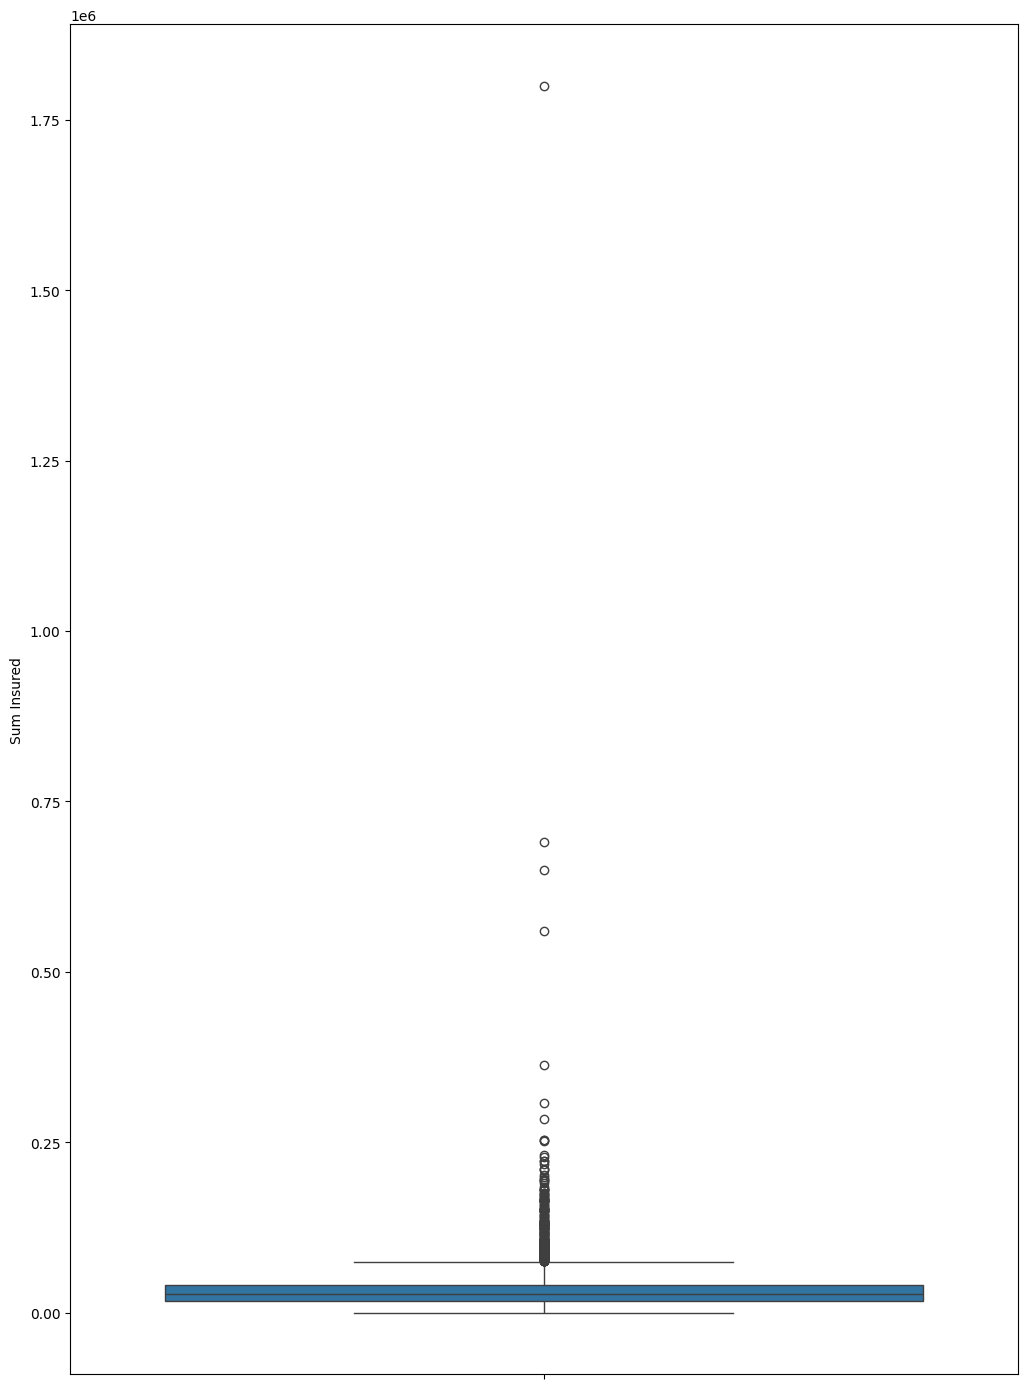

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,14))

plt.subplot(1,2,1)
sns.boxplot(df['Sum Insured'])

# plt.subplot(1,2,2)
# sns.histplot(df.income)

plt.tight_layout()

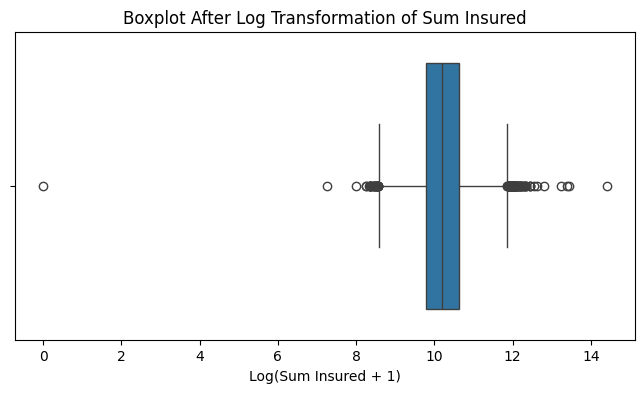

In [147]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log transformation (add 1 to avoid log(0) issues)
df['log_sum_insured'] = np.log(df['Sum Insured'] + 1)

# Plot the transformed data
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['log_sum_insured'])
plt.title('Boxplot After Log Transformation of Sum Insured')
plt.xlabel('Log(Sum Insured + 1)')
plt.show()

In [148]:
df.columns

Index(['PolicySubmissiondate', 'PolicyID', 'Type Of Policy', 'SBU',
       'Inceptiondate', 'Expirydate', 'TIEUPNUMBER', 'Sum Insured', 'STATE',
       'Manufacturer', 'NET PREMIUM PAYABLE', 'NCB AMOUNT',
       'COVERAGE_DEP-ODPremium', 'OD Premium', 'TP PREMIUM', 'IDV',
       'Policy Term', 'Engine-Chassis', 'Claim Count', 'Claim Cost',
       'Vehicle Age', 'target', 'log_sum_insured'],
      dtype='object')

In [149]:
df.describe()

,Sum Insured,NET PREMIUM PAYABLE,NCB AMOUNT,COVERAGE_DEP-ODPremium,OD Premium,TP PREMIUM,IDV,Policy Term,Claim Count,Claim Cost,Vehicle Age,target,log_sum_insured
count,6.996000e+03,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6.996000e+03,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000
mean,3.378983e+04,1393.966186,-129.032760,165.616504,375.696607,795.904016,3.371598e+04,1.007719,0.028016,206.717539,9.995569,0.699828,10.207701
std,3.505581e+04,843.802864,108.299063,80.223698,571.700263,151.327896,3.480761e+04,0.114423,0.181531,1751.452013,3.716064,0.458365,0.649432
min,0.000000e+00,52.930000,-2549.150000,45.200000,12.860000,0.000000,1.400000e+03,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,1.800000e+04,1080.015000,-148.702500,159.630000,185.420000,752.000000,1.800000e+04,1.000000,0.000000,0.000000,7.000000,0.000000,9.798183
50%,2.690500e+04,1420.600000,-115.920000,165.604982,288.395000,752.000000,2.690000e+04,1.000000,0.000000,0.000000,9.000000,1.000000,10.200105
75%,4.090000e+04,1593.657500,-73.920000,165.604982,432.960000,795.941928,4.078275e+04,1.000000,0.000000,0.000000,12.000000,1.000000,10.618910
max,1.800000e+06,45541.960000,-5.790000,3420.000000,35174.880000,2323.000000,1.800000e+06,3.000000,3.000000,47903.000000,34.000000,1.000000,14.403298


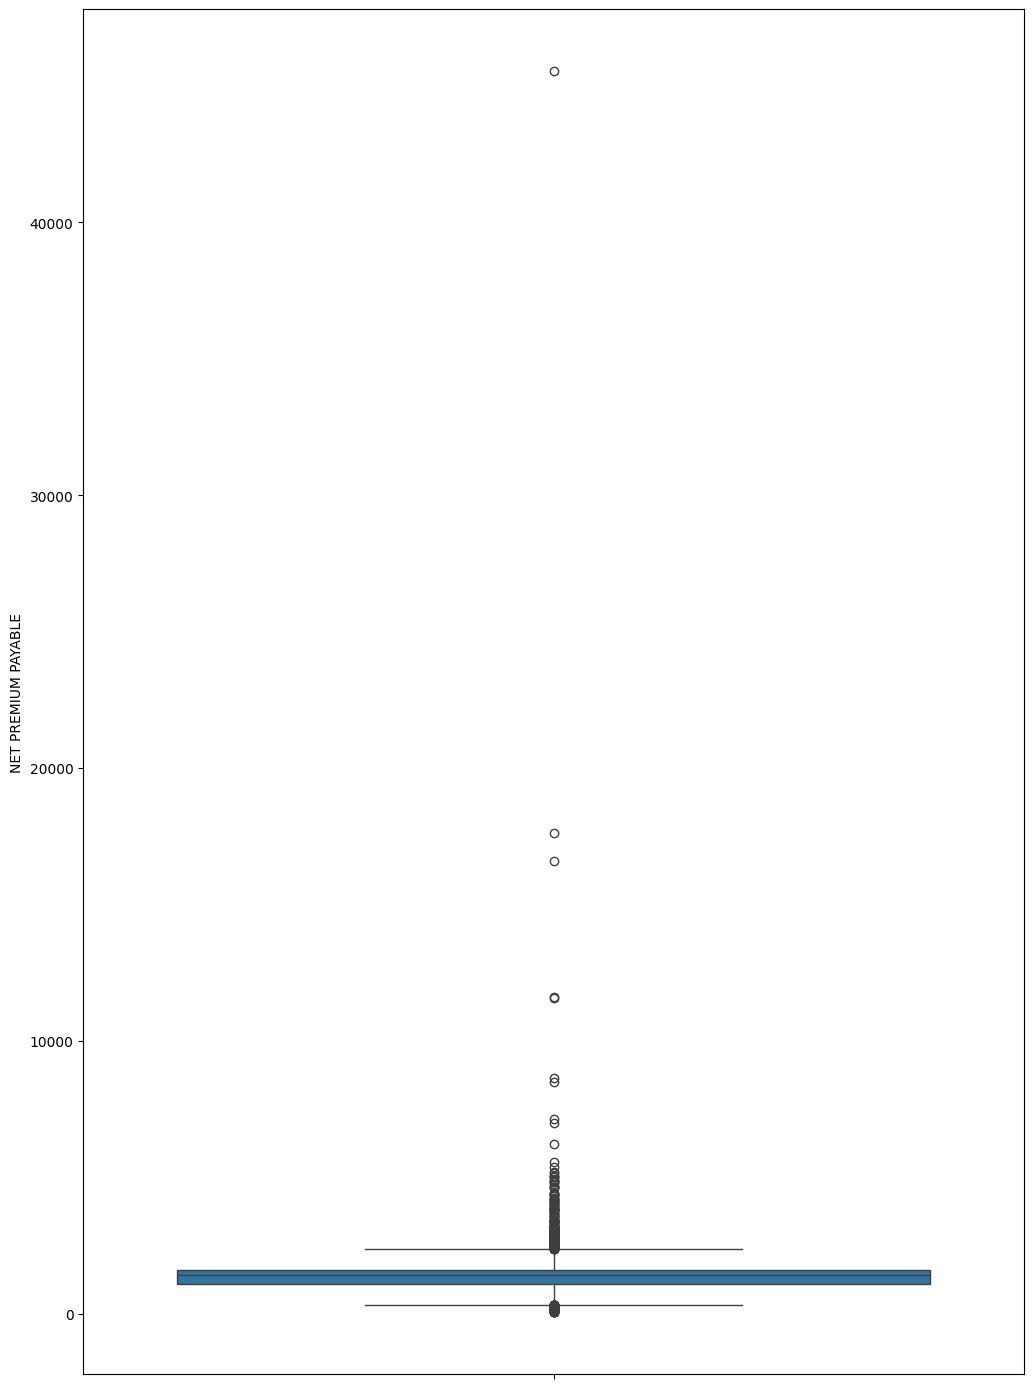

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,14))

plt.subplot(1,2,1)
sns.boxplot(df['NET PREMIUM PAYABLE'])

# plt.subplot(1,2,2)
# sns.histplot(df.income)

plt.tight_layout()

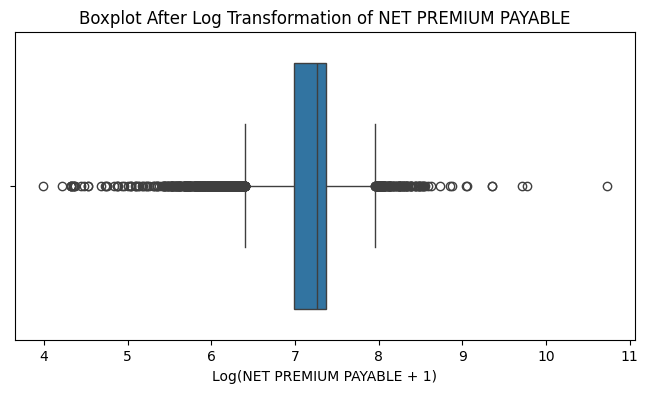

In [151]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log transformation (add 1 to avoid log(0) issues)
df['log_NET_PREMIUM_PAYABLE'] = np.log(df['NET PREMIUM PAYABLE'] + 1)

# Plot the transformed data
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['log_NET_PREMIUM_PAYABLE'])
plt.title('Boxplot After Log Transformation of NET PREMIUM PAYABLE')
plt.xlabel('Log(NET PREMIUM PAYABLE + 1)')
plt.show()

In [152]:
df.columns

Index(['PolicySubmissiondate', 'PolicyID', 'Type Of Policy', 'SBU',
       'Inceptiondate', 'Expirydate', 'TIEUPNUMBER', 'Sum Insured', 'STATE',
       'Manufacturer', 'NET PREMIUM PAYABLE', 'NCB AMOUNT',
       'COVERAGE_DEP-ODPremium', 'OD Premium', 'TP PREMIUM', 'IDV',
       'Policy Term', 'Engine-Chassis', 'Claim Count', 'Claim Cost',
       'Vehicle Age', 'target', 'log_sum_insured', 'log_NET_PREMIUM_PAYABLE'],
      dtype='object')

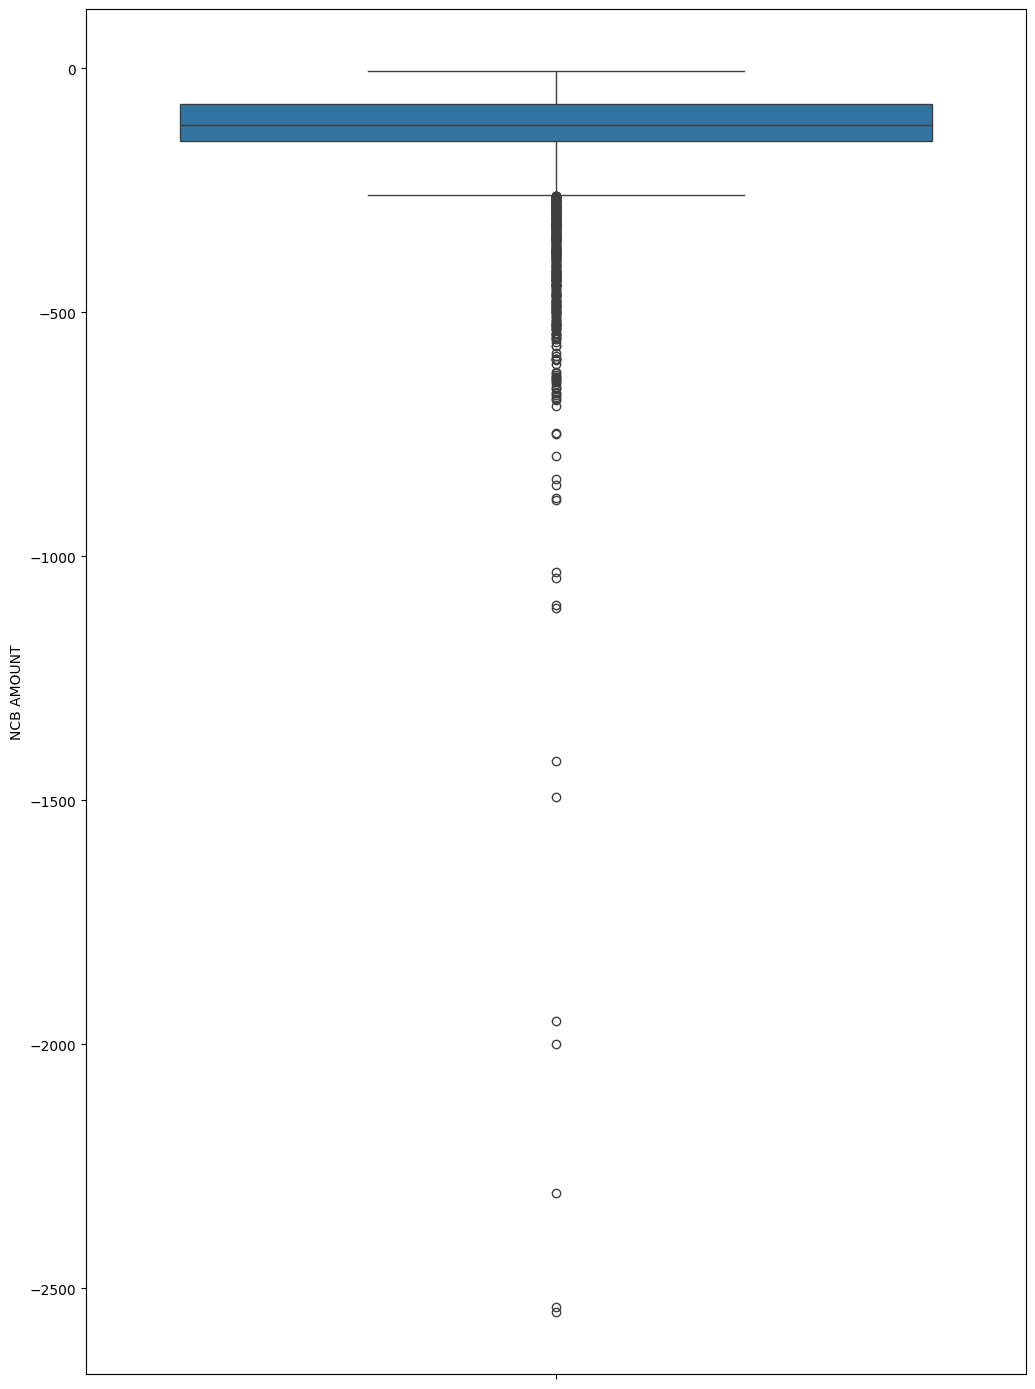

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,14))

plt.subplot(1,2,1)
sns.boxplot(df['NCB AMOUNT'])

# plt.subplot(1,2,2)
# sns.histplot(df.income)

plt.tight_layout()

In [154]:
df['NCB AMOUNT'] = df['NCB AMOUNT'] * -1

In [155]:
df.columns

Index(['PolicySubmissiondate', 'PolicyID', 'Type Of Policy', 'SBU',
       'Inceptiondate', 'Expirydate', 'TIEUPNUMBER', 'Sum Insured', 'STATE',
       'Manufacturer', 'NET PREMIUM PAYABLE', 'NCB AMOUNT',
       'COVERAGE_DEP-ODPremium', 'OD Premium', 'TP PREMIUM', 'IDV',
       'Policy Term', 'Engine-Chassis', 'Claim Count', 'Claim Cost',
       'Vehicle Age', 'target', 'log_sum_insured', 'log_NET_PREMIUM_PAYABLE'],
      dtype='object')

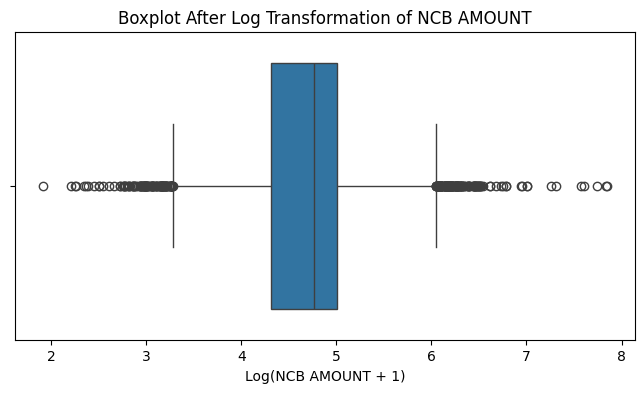

In [156]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log transformation (add 1 to avoid log(0) issues)
df['log_NCB_AMOUNT'] = np.log(df['NCB AMOUNT'] + 1)

# Plot the transformed data
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['log_NCB_AMOUNT'])
plt.title('Boxplot After Log Transformation of NCB AMOUNT')
plt.xlabel('Log(NCB AMOUNT + 1)')
plt.show()

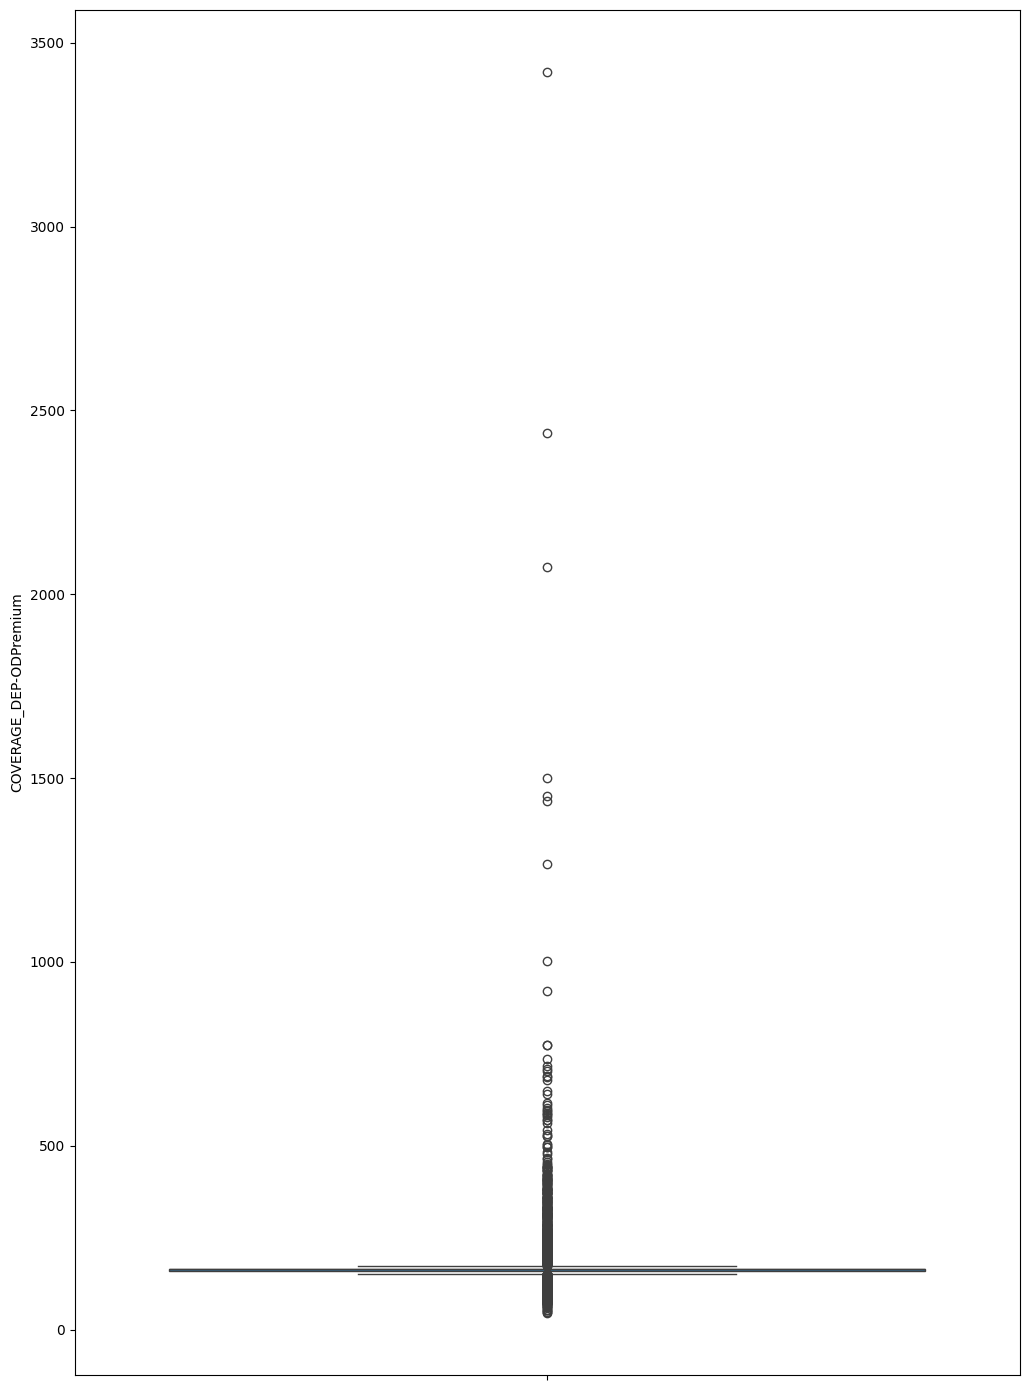

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,14))

plt.subplot(1,2,1)
sns.boxplot(df['COVERAGE_DEP-ODPremium'])

# plt.subplot(1,2,2)
# sns.histplot(df.income)

plt.tight_layout()

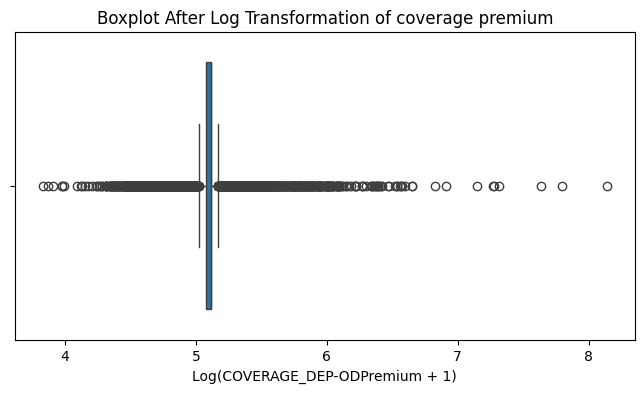

In [158]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log transformation (add 1 to avoid log(0) issues)
df['log_coverage_premium'] = np.log(df['COVERAGE_DEP-ODPremium'] + 1)

# Plot the transformed data
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['log_coverage_premium'])
plt.title('Boxplot After Log Transformation of coverage premium')
plt.xlabel('Log(COVERAGE_DEP-ODPremium + 1)')
plt.show()

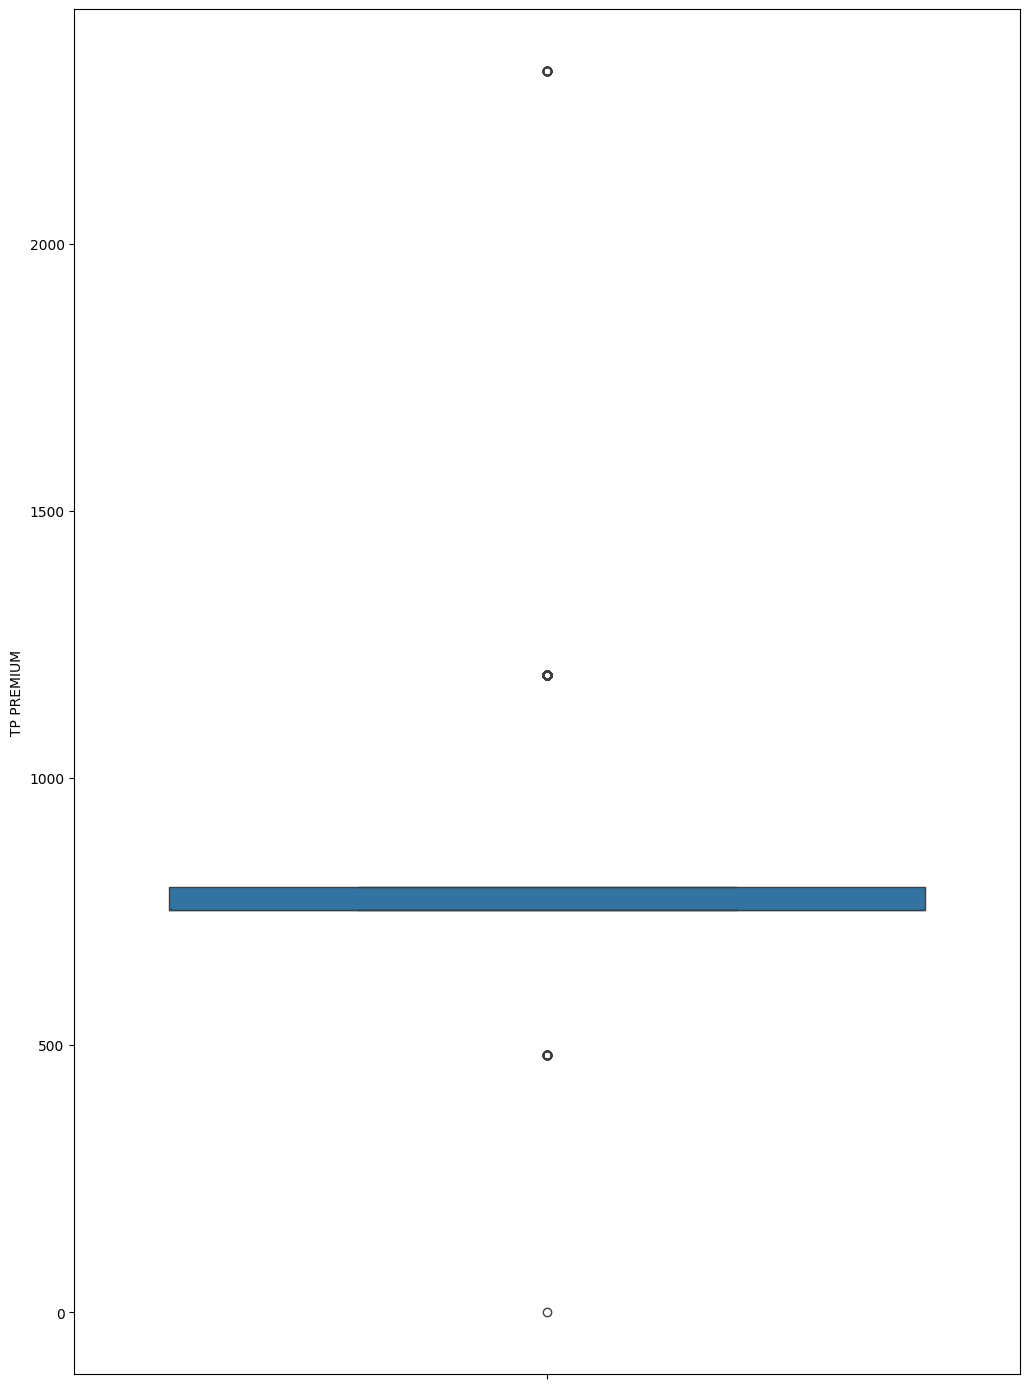

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,14))

plt.subplot(1,2,1)
sns.boxplot(df['TP PREMIUM'])

# plt.subplot(1,2,2)
# sns.histplot(df.income)

plt.tight_layout()

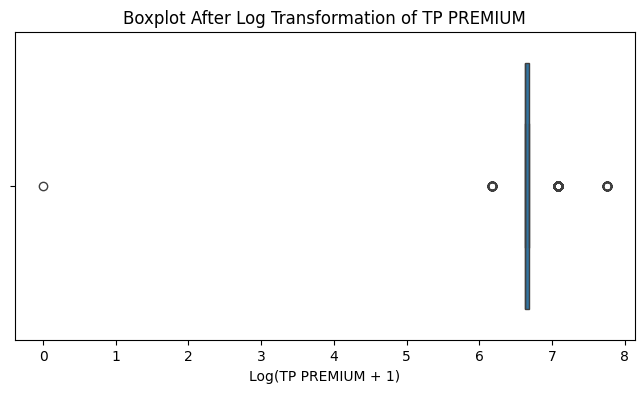

In [160]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log transformation (add 1 to avoid log(0) issues)
df['log_tp_premium'] = np.log(df['TP PREMIUM'] + 1)

# Plot the transformed data
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['log_tp_premium'])
plt.title('Boxplot After Log Transformation of TP PREMIUM')
plt.xlabel('Log(TP PREMIUM + 1)')
plt.show()

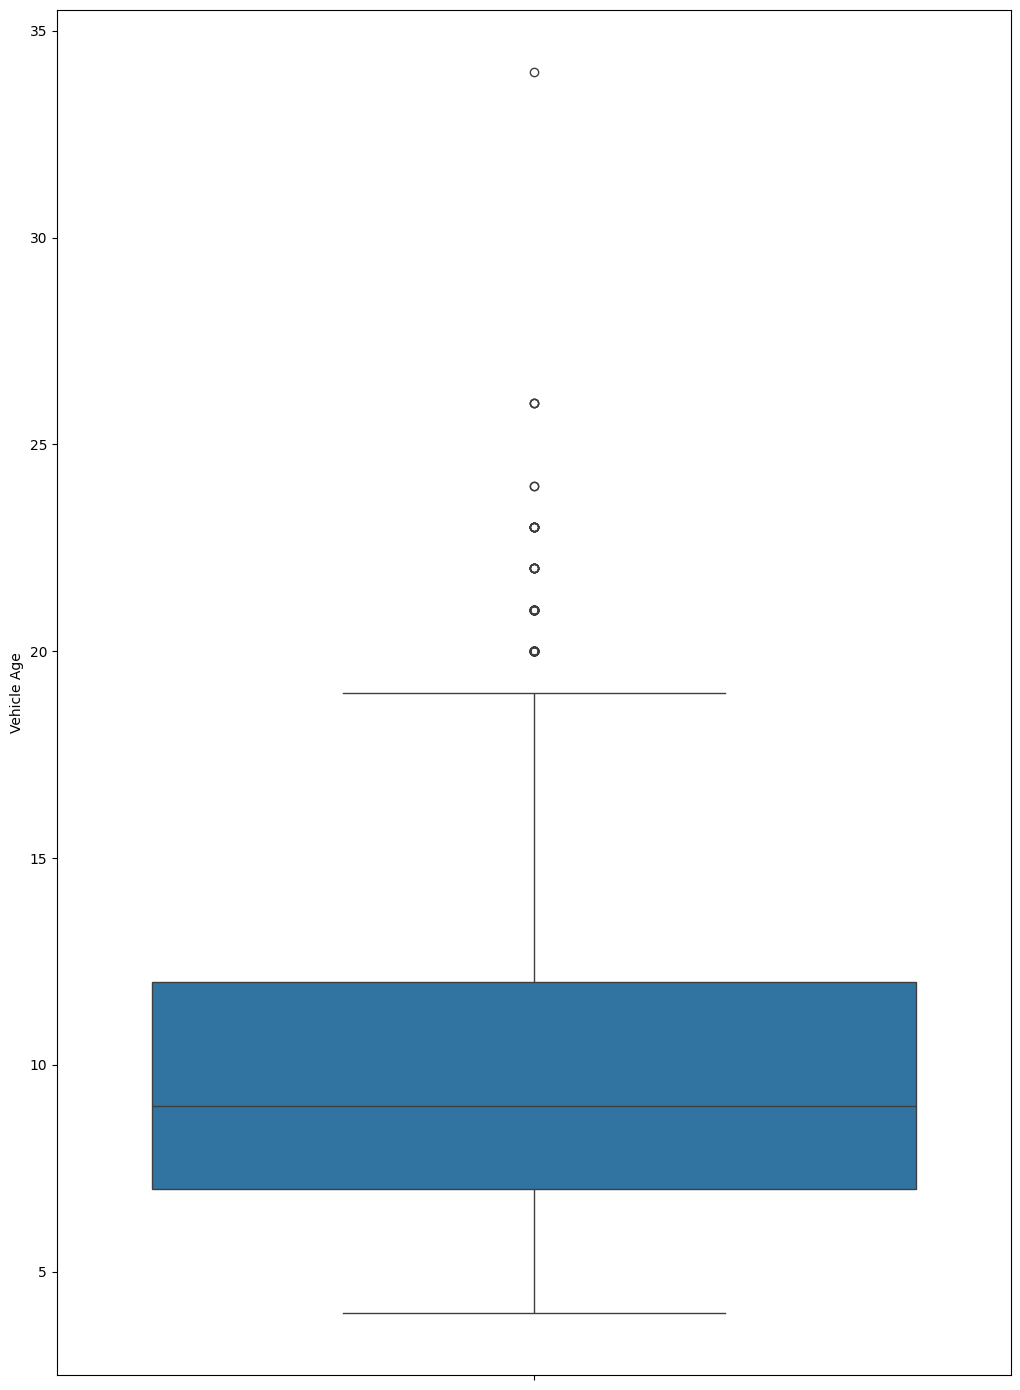

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,14))

plt.subplot(1,2,1)
sns.boxplot(df['Vehicle Age'])

# plt.subplot(1,2,2)
# sns.histplot(df.income)

plt.tight_layout()

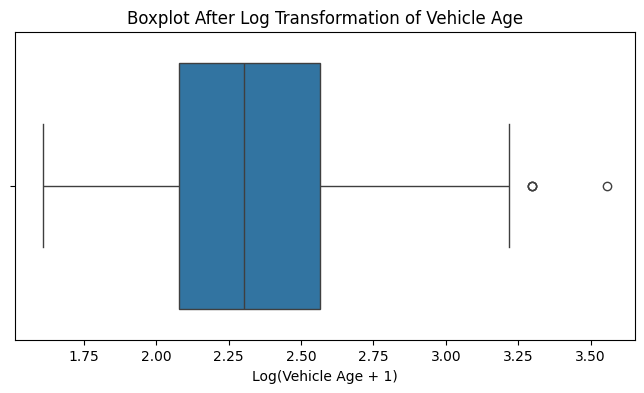

In [162]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log transformation (add 1 to avoid log(0) issues)
df['log_VehicleAge'] = np.log(df['Vehicle Age'] + 1)

# Plot the transformed data
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['log_VehicleAge'])
plt.title('Boxplot After Log Transformation of Vehicle Age')
plt.xlabel('Log(Vehicle Age + 1)')
plt.show()


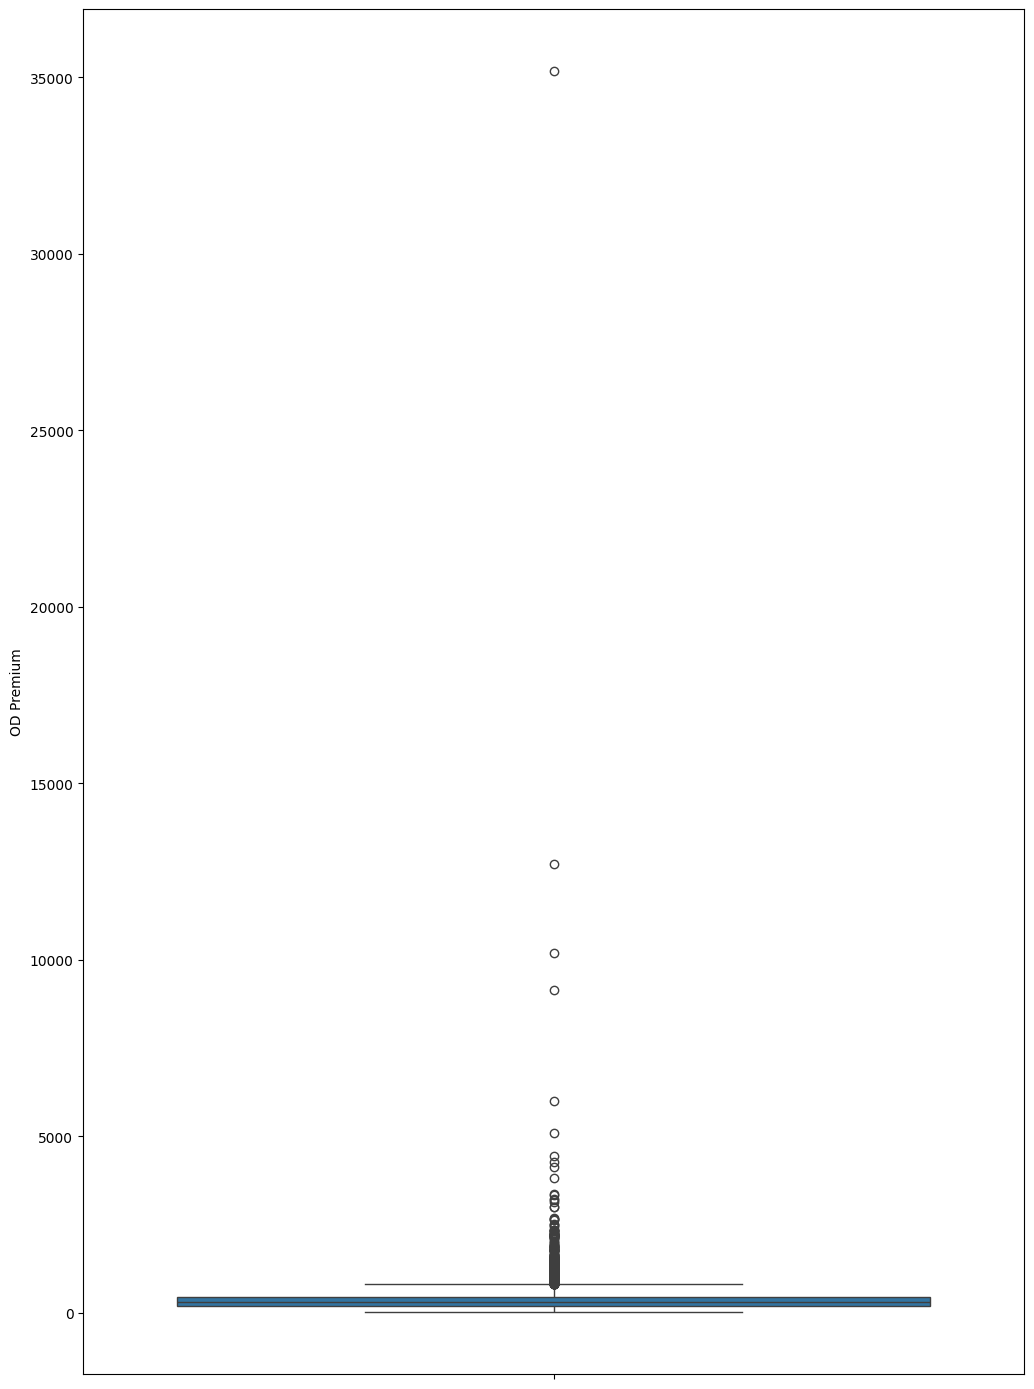

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,14))

plt.subplot(1,2,1)
sns.boxplot(df['OD Premium'])

# plt.subplot(1,2,2)
# sns.histplot(df.income)

plt.tight_layout()

In [164]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace(r'\W', '', regex=True)
df.columns

Index(['policysubmissiondate', 'policyid', 'type_of_policy', 'sbu',
       'inceptiondate', 'expirydate', 'tieupnumber', 'sum_insured', 'state',
       'manufacturer', 'net_premium_payable', 'ncb_amount',
       'coverage_depodpremium', 'od_premium', 'tp_premium', 'idv',
       'policy_term', 'enginechassis', 'claim_count', 'claim_cost',
       'vehicle_age', 'target', 'log_sum_insured', 'log_net_premium_payable',
       'log_ncb_amount', 'log_coverage_premium', 'log_tp_premium',
       'log_vehicleage'],
      dtype='object')

In [165]:
df.columns

Index(['policysubmissiondate', 'policyid', 'type_of_policy', 'sbu',
       'inceptiondate', 'expirydate', 'tieupnumber', 'sum_insured', 'state',
       'manufacturer', 'net_premium_payable', 'ncb_amount',
       'coverage_depodpremium', 'od_premium', 'tp_premium', 'idv',
       'policy_term', 'enginechassis', 'claim_count', 'claim_cost',
       'vehicle_age', 'target', 'log_sum_insured', 'log_net_premium_payable',
       'log_ncb_amount', 'log_coverage_premium', 'log_tp_premium',
       'log_vehicleage'],
      dtype='object')

In [166]:
outlier_threshold=150000
df=df.loc[df.sum_insured <= outlier_threshold]

In [167]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(20,14))

# plt.subplot(1,2,1)
# sns.boxplot(df['sum_insured'])

# # plt.subplot(1,2,2)
# # sns.histplot(df.income)

# plt.tight_layout()

In [168]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(20,14))

# plt.subplot(1,2,1)
# sns.boxplot(df['od_premium'])

# # plt.subplot(1,2,2)
# # sns.histplot(df.income)

# plt.tight_layout()

In [169]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Apply log transformation (add 1 to avoid log(0) issues)
# df['log_od_premium'] = np.log(df['od_premium'] + 1)

# # Plot the transformed data
# plt.figure(figsize=(8, 4))
# sns.boxplot(x=df['log_od_premium'])
# plt.title('Boxplot After Log Transformation of od_premium')
# plt.xlabel('Log(od_premium + 1)')
# plt.show()


In [170]:
# df[df['log_od_premium'] == 0]['od_premium']

In [171]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(20,14))

# plt.subplot(1,2,1)
# sns.boxplot(df['claim_cost'])

# # plt.subplot(1,2,2)
# # sns.histplot(df.income)

# plt.tight_layout()

In [172]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Apply log transformation (add 1 to avoid log(0) issues)
# df['log_claim_cost'] = np.log(df['claim_cost'] + 1)

# # Plot the transformed data
# plt.figure(figsize=(8, 4))
# sns.boxplot(x=df['log_claim_cost'])
# plt.title('Boxplot After Log Transformation of claim_cost')
# plt.xlabel('Log(claim_cost + 1)')
# plt.show()

In [173]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(20,14))

# plt.subplot(1,2,1)
# sns.boxplot(df['claim_count'])

# # plt.subplot(1,2,2)
# # sns.histplot(df.income)

# plt.tight_layout()

In [174]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Apply log transformation (add 1 to avoid log(0) issues)
# df['log_claim_count'] = np.log(df['claim_count'] + 1)

# # Plot the transformed data
# plt.figure(figsize=(8, 4))
# sns.boxplot(x=df['log_claim_count'])
# plt.title('Boxplot After Log Transformation of claim_count')
# plt.xlabel('Log(od_premium + 1)')
# plt.show()

In [175]:
duplicate_mask = df.duplicated()
print(f'No of duplicate rows: {duplicate_mask.sum()}')

No of duplicate rows: 0


In [176]:
df['policysubmissiondate'] = pd.to_datetime(df['policysubmissiondate'], format='%Y-%m-%d')

In [177]:
df['inceptiondate'] = pd.to_datetime(df['inceptiondate'], format='%Y-%m-%d')

In [178]:
df['expirydate'] = pd.to_datetime(df['expirydate'], format='%Y-%m-%d')

In [179]:
df.describe

<bound method NDFrame.describe of      policysubmissiondate  policyid          type_of_policy sbu inceptiondate  \
0              2021-12-25  f12a6079        Our Own Renewals  D7    2022-01-01   
1              2021-12-22  f8f90d19  Other Company Renewals  F5    2022-01-01   
2              2021-12-25  743b937e        Our Own Renewals  27    2022-01-01   
3              2021-12-09  447ce90f        Our Own Renewals  A6    2022-01-01   
4              2021-12-27  6ae1e696        Our Own Renewals  74    2022-01-16   
...                   ...       ...                     ...  ..           ...   
6995           2021-12-21  9772e102        Our Own Renewals  96    2022-01-04   
6996           2021-12-29  45c5ce89        Our Own Renewals  51    2022-01-02   
6997           2022-01-02  8e0d8f07        Our Own Renewals  74    2022-01-03   
6998           2021-12-31  ede9e5b9        Our Own Renewals  K2    2022-01-04   
6999           2022-01-03  65e277eb  Other Company Renewals  A6    2022-01-

In [180]:
df.shape

(6937, 28)

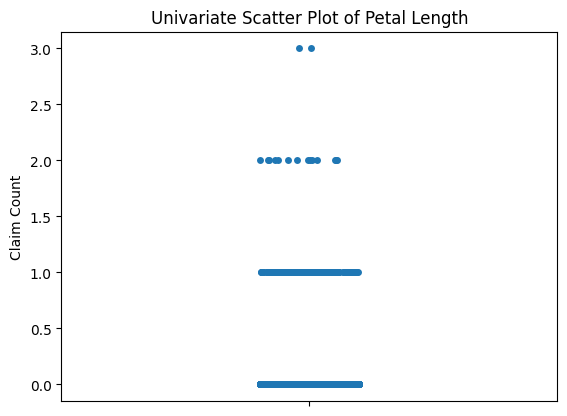

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.stripplot(data=df['claim_count'], jitter=True)

# 3. Show the plot
plt.title('Univariate Scatter Plot of Petal Length')
plt.ylabel('Claim Count')
plt.show()


In [182]:
df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 6937 entries, 0 to 6999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   policysubmissiondate     6937 non-null   datetime64[ns]
 1   policyid                 6937 non-null   object        
 2   type_of_policy           6937 non-null   object        
 3   sbu                      6937 non-null   object        
 4   inceptiondate            6937 non-null   datetime64[ns]
 5   expirydate               6937 non-null   datetime64[ns]
 6   tieupnumber              6937 non-null   object        
 7   sum_insured              6937 non-null   float64       
 8   state                    6937 non-null   object        
 9   manufacturer             6937 non-null   object        
 10  net_premium_payable      6937 non-null   float64       
 11  ncb_amount               6937 non-null   float64       
 12  coverage_depodpremium    6937 non-null 

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6937 entries, 0 to 6999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   policysubmissiondate     6937 non-null   datetime64[ns]
 1   policyid                 6937 non-null   object        
 2   type_of_policy           6937 non-null   object        
 3   sbu                      6937 non-null   object        
 4   inceptiondate            6937 non-null   datetime64[ns]
 5   expirydate               6937 non-null   datetime64[ns]
 6   tieupnumber              6937 non-null   object        
 7   sum_insured              6937 non-null   float64       
 8   state                    6937 non-null   object        
 9   manufacturer             6937 non-null   object        
 10  net_premium_payable      6937 non-null   float64       
 11  ncb_amount               6937 non-null   float64       
 12  coverage_depodpremium    6937 non-null 

In [184]:
df.columns

Index(['policysubmissiondate', 'policyid', 'type_of_policy', 'sbu',
       'inceptiondate', 'expirydate', 'tieupnumber', 'sum_insured', 'state',
       'manufacturer', 'net_premium_payable', 'ncb_amount',
       'coverage_depodpremium', 'od_premium', 'tp_premium', 'idv',
       'policy_term', 'enginechassis', 'claim_count', 'claim_cost',
       'vehicle_age', 'target', 'log_sum_insured', 'log_net_premium_payable',
       'log_ncb_amount', 'log_coverage_premium', 'log_tp_premium',
       'log_vehicleage'],
      dtype='object')

delete pincode, ncb, endorsement, inceptionyr, 'carrying_capacity', 'cubic_capacity'

In [185]:
# import matplotlib.pyplot as plt 
# import pandas as pd 
# import numpy as np


# columns=[col for col in df.columns if col!='target']

# for col in columns:
#     y = df[col]
#     x = np.random.normal(1, 0.01, size=len(y))
#     plt.figure(figsize=(10, 14))
#     plt.scatter(x,y, marker='o', s=50, alpha=0.7)
#     plt.title(f'Univariate Scatter Plots')
#     plt.ylabel(col)
#     # plt.xticks([])  # Hide x-axis since x is artificial
#     plt.show()


In [186]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# df=pd.read_csv('train.csv')

# sns.stripplot(y='Claim Count', data=df, jitter=True)

# # 3. Show the plot
# plt.title('Univariate Scatter Plot of Petal Length')
# plt.ylabel('Claim Count')
# plt.show()


using log transformation for od_premium since it is right skewed

In [187]:
df.shape 

(6937, 28)

In [188]:
df.columns

Index(['policysubmissiondate', 'policyid', 'type_of_policy', 'sbu',
       'inceptiondate', 'expirydate', 'tieupnumber', 'sum_insured', 'state',
       'manufacturer', 'net_premium_payable', 'ncb_amount',
       'coverage_depodpremium', 'od_premium', 'tp_premium', 'idv',
       'policy_term', 'enginechassis', 'claim_count', 'claim_cost',
       'vehicle_age', 'target', 'log_sum_insured', 'log_net_premium_payable',
       'log_ncb_amount', 'log_coverage_premium', 'log_tp_premium',
       'log_vehicleage'],
      dtype='object')

In [189]:
df.columns

Index(['policysubmissiondate', 'policyid', 'type_of_policy', 'sbu',
       'inceptiondate', 'expirydate', 'tieupnumber', 'sum_insured', 'state',
       'manufacturer', 'net_premium_payable', 'ncb_amount',
       'coverage_depodpremium', 'od_premium', 'tp_premium', 'idv',
       'policy_term', 'enginechassis', 'claim_count', 'claim_cost',
       'vehicle_age', 'target', 'log_sum_insured', 'log_net_premium_payable',
       'log_ncb_amount', 'log_coverage_premium', 'log_tp_premium',
       'log_vehicleage'],
      dtype='object')

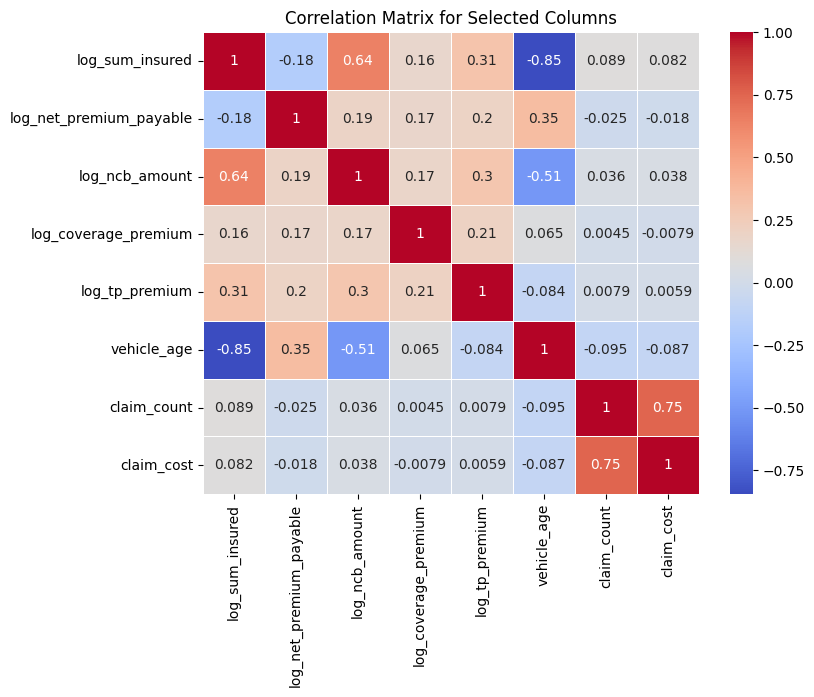

In [190]:
 import pandas as pd 
 import matplotlib.pyplot as plt 
 import seaborn as sns 

 cols=['log_sum_insured','log_net_premium_payable','log_ncb_amount','log_coverage_premium','log_tp_premium','vehicle_age','claim_count','claim_cost']

 corr_matrix=df[cols].corr()
 plt.figure(figsize=(8, 6))
 sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
 plt.title('Correlation Matrix for Selected Columns')
 plt.show()


In this correlation matrix 

In [191]:
df.columns

Index(['policysubmissiondate', 'policyid', 'type_of_policy', 'sbu',
       'inceptiondate', 'expirydate', 'tieupnumber', 'sum_insured', 'state',
       'manufacturer', 'net_premium_payable', 'ncb_amount',
       'coverage_depodpremium', 'od_premium', 'tp_premium', 'idv',
       'policy_term', 'enginechassis', 'claim_count', 'claim_cost',
       'vehicle_age', 'target', 'log_sum_insured', 'log_net_premium_payable',
       'log_ncb_amount', 'log_coverage_premium', 'log_tp_premium',
       'log_vehicleage'],
      dtype='object')

In [192]:
df.reset_index(inplace=True, drop=True)

In [193]:
df

,policysubmissiondate,policyid,type_of_policy,sbu,inceptiondate,expirydate,tieupnumber,sum_insured,state,manufacturer,...,claim_count,claim_cost,vehicle_age,target,log_sum_insured,log_net_premium_payable,log_ncb_amount,log_coverage_premium,log_tp_premium,log_vehicleage
0,2021-12-25,f12a6079,Our Own Renewals,D7,2022-01-01,2022-12-31,30344113,57335.0,MADHYA PRADESH,HONDA,...,0.0,0.0,5.0,0,10.956684,6.792670,5.035588,4.972172,6.680782,1.791759
1,2021-12-22,f8f90d19,Other Company Renewals,F5,2022-01-01,2022-12-31,9d41fa3e,10000.0,KARNATAKA,HERO,...,0.0,0.0,18.0,0,9.210440,6.887991,4.369828,5.115626,6.624065,2.944439
2,2021-12-25,743b937e,Our Own Renewals,27,2022-01-01,2022-12-31,8c8bb2c1,30870.0,HARYANA,TVS,...,0.0,0.0,8.0,0,10.337573,7.344848,5.148308,5.115626,6.624065,2.197225
3,2021-12-09,447ce90f,Our Own Renewals,A6,2022-01-01,2022-12-31,fffcb05a,23980.0,KARNATAKA,HONDA,...,0.0,0.0,10.0,0,10.085017,7.313594,5.134739,5.115626,6.624065,2.397895
4,2021-12-27,6ae1e696,Our Own Renewals,74,2022-01-16,2023-01-15,4c2e4e96,38518.0,UTTAR PRADESH,TVS,...,0.0,0.0,8.0,0,10.558907,7.292371,5.368496,5.447211,6.624065,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,2021-12-21,9772e102,Our Own Renewals,96,2022-01-04,2023-01-03,34a0fb5f,13100.0,TAMIL NADU,TVS,...,0.0,0.0,9.0,1,9.480444,7.275297,3.722072,5.115626,6.624065,2.302585
6933,2021-12-29,45c5ce89,Our Own Renewals,51,2022-01-02,2023-01-01,c410f386,13900.0,GUJARAT,HONDA,...,0.0,0.0,13.0,1,9.539716,7.345662,4.327702,4.460029,6.624065,2.639057
6934,2022-01-02,8e0d8f07,Our Own Renewals,74,2022-01-03,2023-01-02,9fd4aaf1,31080.0,MAHARASHTRA,HONDA,...,0.0,0.0,9.0,1,10.344352,7.320044,4.419443,5.115626,6.624065,2.302585
6935,2021-12-31,ede9e5b9,Our Own Renewals,K2,2022-01-04,2023-01-03,85cb4f16,75000.0,TAMIL NADU,BAJAJ,...,0.0,0.0,6.0,1,11.225257,6.493179,4.204693,5.278115,6.680782,1.945910


In [194]:
df.shape

(6937, 28)

In [195]:
df['type_of_policy'].value_counts()

type_of_policy
Our Own Renewals             5727
Other Company Renewals       1145
Old vehicle/ SaleTransfer      65
Name: count, dtype: int64

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6937 entries, 0 to 6936
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   policysubmissiondate     6937 non-null   datetime64[ns]
 1   policyid                 6937 non-null   object        
 2   type_of_policy           6937 non-null   object        
 3   sbu                      6937 non-null   object        
 4   inceptiondate            6937 non-null   datetime64[ns]
 5   expirydate               6937 non-null   datetime64[ns]
 6   tieupnumber              6937 non-null   object        
 7   sum_insured              6937 non-null   float64       
 8   state                    6937 non-null   object        
 9   manufacturer             6937 non-null   object        
 10  net_premium_payable      6937 non-null   float64       
 11  ncb_amount               6937 non-null   float64       
 12  coverage_depodpremium    6937 non-

In [197]:
df['sbu'].value_counts().count()

np.int64(463)

In [198]:
df['type_of_policy']
print(df['type_of_policy'])

0             Our Own Renewals
1       Other Company Renewals
2             Our Own Renewals
3             Our Own Renewals
4             Our Own Renewals
                 ...          
6932          Our Own Renewals
6933          Our Own Renewals
6934          Our Own Renewals
6935          Our Own Renewals
6936    Other Company Renewals
Name: type_of_policy, Length: 6937, dtype: object


In [199]:
from sklearn.preprocessing import OneHotEncoder
df_onehot=pd.get_dummies(df,columns=['state','manufacturer','type_of_policy'])

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6937 entries, 0 to 6936
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   policysubmissiondate     6937 non-null   datetime64[ns]
 1   policyid                 6937 non-null   object        
 2   type_of_policy           6937 non-null   object        
 3   sbu                      6937 non-null   object        
 4   inceptiondate            6937 non-null   datetime64[ns]
 5   expirydate               6937 non-null   datetime64[ns]
 6   tieupnumber              6937 non-null   object        
 7   sum_insured              6937 non-null   float64       
 8   state                    6937 non-null   object        
 9   manufacturer             6937 non-null   object        
 10  net_premium_payable      6937 non-null   float64       
 11  ncb_amount               6937 non-null   float64       
 12  coverage_depodpremium    6937 non-

In [201]:
df_onehot.columns

Index(['policysubmissiondate', 'policyid', 'sbu', 'inceptiondate',
       'expirydate', 'tieupnumber', 'sum_insured', 'net_premium_payable',
       'ncb_amount', 'coverage_depodpremium', 'od_premium', 'tp_premium',
       'idv', 'policy_term', 'enginechassis', 'claim_count', 'claim_cost',
       'vehicle_age', 'target', 'log_sum_insured', 'log_net_premium_payable',
       'log_ncb_amount', 'log_coverage_premium', 'log_tp_premium',
       'log_vehicleage', 'state_ANDAMAN & NICOBAR', 'state_ANDHRA PRADESH',
       'state_ASSAM', 'state_BIHAR', 'state_CHANDIGARH', 'state_CHHATTISGARH',
       'state_DADRA & NAGAR HAVELI', 'state_DAMAN AND DIU', 'state_GOA',
       'state_GUJARAT', 'state_HARYANA', 'state_HIMACHAL PRADESH',
       'state_JAMMU & KASHMIR', 'state_JHARKHAND', 'state_KARNATAKA',
       'state_KERALA', 'state_MADHYA PRADESH', 'state_MAHARASHTRA',
       'state_NEW DELHI', 'state_ODISHA', 'state_PUDUCHERRY', 'state_PUNJAB',
       'state_RAJASTHAN', 'state_TAMIL NADU', 'state_T

In [202]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6937 entries, 0 to 6936
Data columns (total 76 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   policysubmissiondate                      6937 non-null   datetime64[ns]
 1   policyid                                  6937 non-null   object        
 2   sbu                                       6937 non-null   object        
 3   inceptiondate                             6937 non-null   datetime64[ns]
 4   expirydate                                6937 non-null   datetime64[ns]
 5   tieupnumber                               6937 non-null   object        
 6   sum_insured                               6937 non-null   float64       
 7   net_premium_payable                       6937 non-null   float64       
 8   ncb_amount                                6937 non-null   float64       
 9   coverage_depodpremium         

In [203]:
df_onehot.drop(columns=['sbu', 'tieupnumber', 'enginechassis'], inplace=True)

In [204]:
df_onehot['Year'] = df_onehot['inceptiondate'].dt.year       
df_onehot['Month'] = df_onehot['inceptiondate'].dt.month     
df_onehot['Day'] = df_onehot['inceptiondate'].dt.day   

In [205]:
df_onehot.columns

Index(['policysubmissiondate', 'policyid', 'inceptiondate', 'expirydate',
       'sum_insured', 'net_premium_payable', 'ncb_amount',
       'coverage_depodpremium', 'od_premium', 'tp_premium', 'idv',
       'policy_term', 'claim_count', 'claim_cost', 'vehicle_age', 'target',
       'log_sum_insured', 'log_net_premium_payable', 'log_ncb_amount',
       'log_coverage_premium', 'log_tp_premium', 'log_vehicleage',
       'state_ANDAMAN & NICOBAR', 'state_ANDHRA PRADESH', 'state_ASSAM',
       'state_BIHAR', 'state_CHANDIGARH', 'state_CHHATTISGARH',
       'state_DADRA & NAGAR HAVELI', 'state_DAMAN AND DIU', 'state_GOA',
       'state_GUJARAT', 'state_HARYANA', 'state_HIMACHAL PRADESH',
       'state_JAMMU & KASHMIR', 'state_JHARKHAND', 'state_KARNATAKA',
       'state_KERALA', 'state_MADHYA PRADESH', 'state_MAHARASHTRA',
       'state_NEW DELHI', 'state_ODISHA', 'state_PUDUCHERRY', 'state_PUNJAB',
       'state_RAJASTHAN', 'state_TAMIL NADU', 'state_TELANGANA',
       'state_TRIPURA', 'sta

In [206]:
df = df_onehot[['idv', 'policy_term', 'claim_count', 'claim_cost', 'vehicle_age', 
       'log_sum_insured', 'log_net_premium_payable', 'log_ncb_amount',
       'log_coverage_premium', 'log_tp_premium', 'log_vehicleage',
       'state_ANDAMAN & NICOBAR', 'state_ANDHRA PRADESH', 'state_ASSAM',
       'state_BIHAR', 'state_CHANDIGARH', 'state_CHHATTISGARH',
       'state_DADRA & NAGAR HAVELI', 'state_DAMAN AND DIU', 'state_GOA',
       'state_GUJARAT', 'state_HARYANA', 'state_HIMACHAL PRADESH',
       'state_JAMMU & KASHMIR', 'state_JHARKHAND', 'state_KARNATAKA',
       'state_KERALA', 'state_MADHYA PRADESH', 'state_MAHARASHTRA',
       'state_NEW DELHI', 'state_ODISHA', 'state_PUDUCHERRY', 'state_PUNJAB',
       'state_RAJASTHAN', 'state_TAMIL NADU', 'state_TELANGANA',
       'state_TRIPURA', 'state_UTTAR PRADESH', 'state_UTTARAKHAND',
       'state_WEST BENGAL', 'manufacturer_APRILIA', 'manufacturer_ATHER',
       'manufacturer_BAJAJ', 'manufacturer_BENELLI', 'manufacturer_HERO',
       'manufacturer_HERO HONDA', 'manufacturer_HONDA', 'manufacturer_JAWA',
       'manufacturer_KTM', 'manufacturer_LML', 'manufacturer_MAHINDRA',
       'manufacturer_OKINAWA', 'manufacturer_PIAGGIO',
       'manufacturer_ROYAL ENFIELD', 'manufacturer_SUZUKI', 'manufacturer_TVS',
       'manufacturer_VESPA', 'manufacturer_YAMAHA', 'manufacturer_YEZDI',
       'type_of_policy_Old vehicle/ SaleTransfer',
       'type_of_policy_Other Company Renewals',
       'type_of_policy_Our Own Renewals', 'Day', 'target',]]

In [207]:
df.shape

(6937, 64)

In [208]:
df.columns

Index(['idv', 'policy_term', 'claim_count', 'claim_cost', 'vehicle_age',
       'log_sum_insured', 'log_net_premium_payable', 'log_ncb_amount',
       'log_coverage_premium', 'log_tp_premium', 'log_vehicleage',
       'state_ANDAMAN & NICOBAR', 'state_ANDHRA PRADESH', 'state_ASSAM',
       'state_BIHAR', 'state_CHANDIGARH', 'state_CHHATTISGARH',
       'state_DADRA & NAGAR HAVELI', 'state_DAMAN AND DIU', 'state_GOA',
       'state_GUJARAT', 'state_HARYANA', 'state_HIMACHAL PRADESH',
       'state_JAMMU & KASHMIR', 'state_JHARKHAND', 'state_KARNATAKA',
       'state_KERALA', 'state_MADHYA PRADESH', 'state_MAHARASHTRA',
       'state_NEW DELHI', 'state_ODISHA', 'state_PUDUCHERRY', 'state_PUNJAB',
       'state_RAJASTHAN', 'state_TAMIL NADU', 'state_TELANGANA',
       'state_TRIPURA', 'state_UTTAR PRADESH', 'state_UTTARAKHAND',
       'state_WEST BENGAL', 'manufacturer_APRILIA', 'manufacturer_ATHER',
       'manufacturer_BAJAJ', 'manufacturer_BENELLI', 'manufacturer_HERO',
       'manufac

In [209]:
df

,idv,policy_term,claim_count,claim_cost,vehicle_age,log_sum_insured,log_net_premium_payable,log_ncb_amount,log_coverage_premium,log_tp_premium,...,manufacturer_SUZUKI,manufacturer_TVS,manufacturer_VESPA,manufacturer_YAMAHA,manufacturer_YEZDI,type_of_policy_Old vehicle/ SaleTransfer,type_of_policy_Other Company Renewals,type_of_policy_Our Own Renewals,Day,target
0,57335.0,1.0,0.0,0.0,5.0,10.956684,6.792670,5.035588,4.972172,6.680782,...,False,False,False,False,False,False,False,True,1,0
1,10000.0,1.0,0.0,0.0,18.0,9.210440,6.887991,4.369828,5.115626,6.624065,...,False,False,False,False,False,False,True,False,1,0
2,30870.0,1.0,0.0,0.0,8.0,10.337573,7.344848,5.148308,5.115626,6.624065,...,False,True,False,False,False,False,False,True,1,0
3,23980.0,1.0,0.0,0.0,10.0,10.085017,7.313594,5.134739,5.115626,6.624065,...,False,False,False,False,False,False,False,True,1,0
4,38518.0,1.0,0.0,0.0,8.0,10.558907,7.292371,5.368496,5.447211,6.624065,...,False,True,False,False,False,False,False,True,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6932,13100.0,1.0,0.0,0.0,9.0,9.480444,7.275297,3.722072,5.115626,6.624065,...,False,True,False,False,False,False,False,True,4,1
6933,13900.0,1.0,0.0,0.0,13.0,9.539716,7.345662,4.327702,4.460029,6.624065,...,False,False,False,False,False,False,False,True,2,1
6934,31080.0,1.0,0.0,0.0,9.0,10.344352,7.320044,4.419443,5.115626,6.624065,...,False,False,False,False,False,False,False,True,3,1
6935,75000.0,1.0,0.0,0.0,6.0,11.225257,6.493179,4.204693,5.278115,6.680782,...,False,False,False,False,False,False,False,True,4,1


In [210]:
df.columns

Index(['idv', 'policy_term', 'claim_count', 'claim_cost', 'vehicle_age',
       'log_sum_insured', 'log_net_premium_payable', 'log_ncb_amount',
       'log_coverage_premium', 'log_tp_premium', 'log_vehicleage',
       'state_ANDAMAN & NICOBAR', 'state_ANDHRA PRADESH', 'state_ASSAM',
       'state_BIHAR', 'state_CHANDIGARH', 'state_CHHATTISGARH',
       'state_DADRA & NAGAR HAVELI', 'state_DAMAN AND DIU', 'state_GOA',
       'state_GUJARAT', 'state_HARYANA', 'state_HIMACHAL PRADESH',
       'state_JAMMU & KASHMIR', 'state_JHARKHAND', 'state_KARNATAKA',
       'state_KERALA', 'state_MADHYA PRADESH', 'state_MAHARASHTRA',
       'state_NEW DELHI', 'state_ODISHA', 'state_PUDUCHERRY', 'state_PUNJAB',
       'state_RAJASTHAN', 'state_TAMIL NADU', 'state_TELANGANA',
       'state_TRIPURA', 'state_UTTAR PRADESH', 'state_UTTARAKHAND',
       'state_WEST BENGAL', 'manufacturer_APRILIA', 'manufacturer_ATHER',
       'manufacturer_BAJAJ', 'manufacturer_BENELLI', 'manufacturer_HERO',
       'manufac

In [211]:
df['target'].value_counts()

target
1    4857
0    2080
Name: count, dtype: int64

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=df[['idv', 'policy_term', 'claim_count', 'claim_cost', 'vehicle_age',
       'log_sum_insured', 'log_net_premium_payable', 'log_ncb_amount',
       'log_coverage_premium', 'log_tp_premium', 'log_vehicleage',
       'state_ANDAMAN & NICOBAR', 'state_ANDHRA PRADESH', 'state_ASSAM',
       'state_BIHAR', 'state_CHANDIGARH', 'state_CHHATTISGARH',
       'state_DADRA & NAGAR HAVELI', 'state_DAMAN AND DIU', 'state_GOA',
       'state_GUJARAT', 'state_HARYANA', 'state_HIMACHAL PRADESH',
       'state_JAMMU & KASHMIR', 'state_JHARKHAND', 'state_KARNATAKA',
       'state_KERALA', 'state_MADHYA PRADESH', 'state_MAHARASHTRA',
       'state_NEW DELHI', 'state_ODISHA', 'state_PUDUCHERRY', 'state_PUNJAB',
       'state_RAJASTHAN', 'state_TAMIL NADU', 'state_TELANGANA',
       'state_TRIPURA', 'state_UTTAR PRADESH', 'state_UTTARAKHAND',
       'state_WEST BENGAL', 'manufacturer_APRILIA', 'manufacturer_ATHER',
       'manufacturer_BAJAJ', 'manufacturer_BENELLI', 'manufacturer_HERO',
       'manufacturer_HERO HONDA', 'manufacturer_HONDA', 'manufacturer_JAWA',
       'manufacturer_KTM', 'manufacturer_LML', 'manufacturer_MAHINDRA',
       'manufacturer_OKINAWA', 'manufacturer_PIAGGIO',
       'manufacturer_ROYAL ENFIELD', 'manufacturer_SUZUKI', 'manufacturer_TVS',
       'manufacturer_VESPA', 'manufacturer_YAMAHA', 'manufacturer_YEZDI',
       'type_of_policy_Old vehicle/ SaleTransfer',
       'type_of_policy_Other Company Renewals',
       'type_of_policy_Our Own Renewals', 'Day']]
Y=df[['target']]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

accuracy=accuracy_score(Y_test,Y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.82


Confusion Matrix:
 [[  0 431]
 [  0 957]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       431
           1       0.69      1.00      0.82       957

    accuracy                           0.69      1388
   macro avg       0.34      0.50      0.41      1388
weighted avg       0.48      0.69      0.56      1388



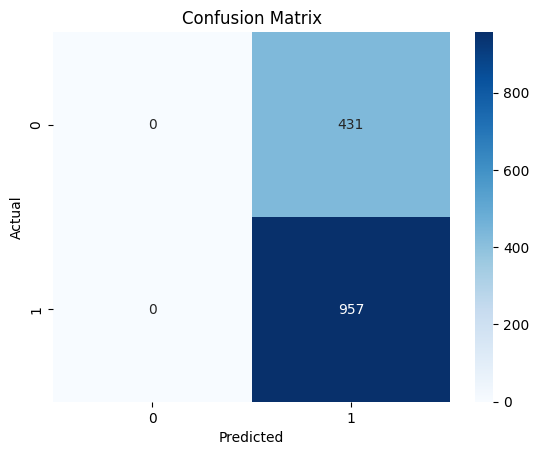

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

X=df[['idv', 'policy_term', 'claim_count', 'claim_cost', 'vehicle_age',
       'log_sum_insured', 'log_net_premium_payable', 'log_ncb_amount',
       'log_coverage_premium', 'log_tp_premium', 'log_vehicleage',
       'state_ANDAMAN & NICOBAR', 'state_ANDHRA PRADESH', 'state_ASSAM',
       'state_BIHAR', 'state_CHANDIGARH', 'state_CHHATTISGARH',
       'state_DADRA & NAGAR HAVELI', 'state_DAMAN AND DIU', 'state_GOA',
       'state_GUJARAT', 'state_HARYANA', 'state_HIMACHAL PRADESH',
       'state_JAMMU & KASHMIR', 'state_JHARKHAND', 'state_KARNATAKA',
       'state_KERALA', 'state_MADHYA PRADESH', 'state_MAHARASHTRA',
       'state_NEW DELHI', 'state_ODISHA', 'state_PUDUCHERRY', 'state_PUNJAB',
       'state_RAJASTHAN', 'state_TAMIL NADU', 'state_TELANGANA',
       'state_TRIPURA', 'state_UTTAR PRADESH', 'state_UTTARAKHAND',
       'state_WEST BENGAL', 'manufacturer_APRILIA', 'manufacturer_ATHER',
       'manufacturer_BAJAJ', 'manufacturer_BENELLI', 'manufacturer_HERO',
       'manufacturer_HERO HONDA', 'manufacturer_HONDA', 'manufacturer_JAWA',
       'manufacturer_KTM', 'manufacturer_LML', 'manufacturer_MAHINDRA',
       'manufacturer_OKINAWA', 'manufacturer_PIAGGIO',
       'manufacturer_ROYAL ENFIELD', 'manufacturer_SUZUKI', 'manufacturer_TVS',
       'manufacturer_VESPA', 'manufacturer_YAMAHA', 'manufacturer_YEZDI',
       'type_of_policy_Old vehicle/ SaleTransfer',
       'type_of_policy_Other Company Renewals',
       'type_of_policy_Our Own Renewals', 'Day']]

Y=df[['target']]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

model=LogisticRegression()
model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [214]:
Y_test

,target
2252,1
5338,1
2789,1
2678,1
6369,1
...,...
652,0
33,0
5495,1
44,0


Confusion Matrix:
 [[183 248]
 [258 699]]

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.42      0.42       431
           1       0.74      0.73      0.73       957

    accuracy                           0.64      1388
   macro avg       0.58      0.58      0.58      1388
weighted avg       0.64      0.64      0.64      1388



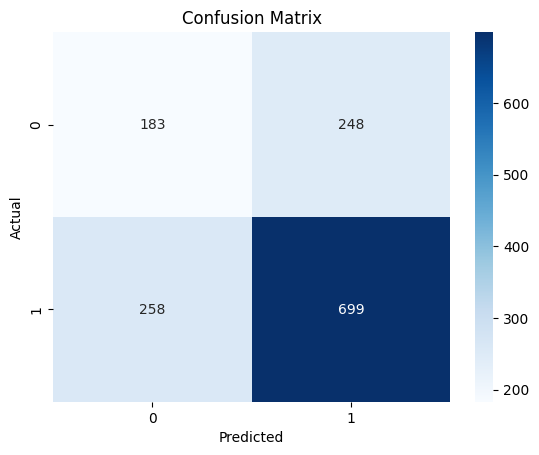

In [215]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

model=LogisticRegression()
model.fit(X_resampled, Y_resampled)

Y_pred=model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, Y_resampled)

# Evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.6354466858789626
Confusion Matrix:
 [[183 248]
 [258 699]]
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.42      0.42       431
           1       0.74      0.73      0.73       957

    accuracy                           0.64      1388
   macro avg       0.58      0.58      0.58      1388
weighted avg       0.64      0.64      0.64      1388



In [217]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_resampled, Y_resampled)

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.6354466858789626
Confusion Matrix:
 [[183 248]
 [258 699]]
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.42      0.42       431
           1       0.74      0.73      0.73       957

    accuracy                           0.64      1388
   macro avg       0.58      0.58      0.58      1388
weighted avg       0.64      0.64      0.64      1388



In [218]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5)
}

xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,              
    scoring='f1_macro',     
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_resampled, Y_resampled)


best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'colsample_bytree': np.float64(0.7541666010159664), 'gamma': np.float64(0.007983126110107097), 'learning_rate': np.float64(0.0792681476866447), 'max_depth': 6, 'n_estimators': 160, 'subsample': np.float64(0.8733054075301833)}
Accuracy: 0.8256484149855908
Confusion Matrix:
 [[247 184]
 [ 58 899]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.57      0.67       431
           1       0.83      0.94      0.88       957

    accuracy                           0.83      1388
   macro avg       0.82      0.76      0.78      1388
weighted avg       0.82      0.83      0.82      1388



In [219]:
df.columns

Index(['idv', 'policy_term', 'claim_count', 'claim_cost', 'vehicle_age',
       'log_sum_insured', 'log_net_premium_payable', 'log_ncb_amount',
       'log_coverage_premium', 'log_tp_premium', 'log_vehicleage',
       'state_ANDAMAN & NICOBAR', 'state_ANDHRA PRADESH', 'state_ASSAM',
       'state_BIHAR', 'state_CHANDIGARH', 'state_CHHATTISGARH',
       'state_DADRA & NAGAR HAVELI', 'state_DAMAN AND DIU', 'state_GOA',
       'state_GUJARAT', 'state_HARYANA', 'state_HIMACHAL PRADESH',
       'state_JAMMU & KASHMIR', 'state_JHARKHAND', 'state_KARNATAKA',
       'state_KERALA', 'state_MADHYA PRADESH', 'state_MAHARASHTRA',
       'state_NEW DELHI', 'state_ODISHA', 'state_PUDUCHERRY', 'state_PUNJAB',
       'state_RAJASTHAN', 'state_TAMIL NADU', 'state_TELANGANA',
       'state_TRIPURA', 'state_UTTAR PRADESH', 'state_UTTARAKHAND',
       'state_WEST BENGAL', 'manufacturer_APRILIA', 'manufacturer_ATHER',
       'manufacturer_BAJAJ', 'manufacturer_BENELLI', 'manufacturer_HERO',
       'manufac

In [220]:
import pickle 
with open('best_model.pkl','wb') as file:
    pickle.dump(best_model,file)

In [221]:
with open('best_model.pkl','rb') as file:
    loaded_model=pickle.load(file)

In [222]:
df.columns

Index(['idv', 'policy_term', 'claim_count', 'claim_cost', 'vehicle_age',
       'log_sum_insured', 'log_net_premium_payable', 'log_ncb_amount',
       'log_coverage_premium', 'log_tp_premium', 'log_vehicleage',
       'state_ANDAMAN & NICOBAR', 'state_ANDHRA PRADESH', 'state_ASSAM',
       'state_BIHAR', 'state_CHANDIGARH', 'state_CHHATTISGARH',
       'state_DADRA & NAGAR HAVELI', 'state_DAMAN AND DIU', 'state_GOA',
       'state_GUJARAT', 'state_HARYANA', 'state_HIMACHAL PRADESH',
       'state_JAMMU & KASHMIR', 'state_JHARKHAND', 'state_KARNATAKA',
       'state_KERALA', 'state_MADHYA PRADESH', 'state_MAHARASHTRA',
       'state_NEW DELHI', 'state_ODISHA', 'state_PUDUCHERRY', 'state_PUNJAB',
       'state_RAJASTHAN', 'state_TAMIL NADU', 'state_TELANGANA',
       'state_TRIPURA', 'state_UTTAR PRADESH', 'state_UTTARAKHAND',
       'state_WEST BENGAL', 'manufacturer_APRILIA', 'manufacturer_ATHER',
       'manufacturer_BAJAJ', 'manufacturer_BENELLI', 'manufacturer_HERO',
       'manufac

In [223]:
X_test.columns

Index(['idv', 'policy_term', 'claim_count', 'claim_cost', 'vehicle_age',
       'log_sum_insured', 'log_net_premium_payable', 'log_ncb_amount',
       'log_coverage_premium', 'log_tp_premium', 'log_vehicleage',
       'state_ANDAMAN & NICOBAR', 'state_ANDHRA PRADESH', 'state_ASSAM',
       'state_BIHAR', 'state_CHANDIGARH', 'state_CHHATTISGARH',
       'state_DADRA & NAGAR HAVELI', 'state_DAMAN AND DIU', 'state_GOA',
       'state_GUJARAT', 'state_HARYANA', 'state_HIMACHAL PRADESH',
       'state_JAMMU & KASHMIR', 'state_JHARKHAND', 'state_KARNATAKA',
       'state_KERALA', 'state_MADHYA PRADESH', 'state_MAHARASHTRA',
       'state_NEW DELHI', 'state_ODISHA', 'state_PUDUCHERRY', 'state_PUNJAB',
       'state_RAJASTHAN', 'state_TAMIL NADU', 'state_TELANGANA',
       'state_TRIPURA', 'state_UTTAR PRADESH', 'state_UTTARAKHAND',
       'state_WEST BENGAL', 'manufacturer_APRILIA', 'manufacturer_ATHER',
       'manufacturer_BAJAJ', 'manufacturer_BENELLI', 'manufacturer_HERO',
       'manufac

In [224]:
from sklearn.inspection import permutation_importance

# Evaluate importance on test data
result = permutation_importance(model, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Display top features
perm_importance = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)

print("Top 10 Important Features by Permutation:")
print(perm_importance.head(10))


Top 10 Important Features by Permutation:
                                  Feature  Importance
0                                     idv    0.059222
60  type_of_policy_Other Company Renewals    0.041210
46                     manufacturer_HONDA    0.020821
4                             vehicle_age    0.020677
62                                    Day    0.017579
44                      manufacturer_HERO    0.007997
6                 log_net_premium_payable    0.007277
61        type_of_policy_Our Own Renewals    0.004179
55                       manufacturer_TVS    0.003890
20                          state_GUJARAT    0.003746


The permutation feature importance technique helps identify which individual features in the dataset contribute most to the model’s predictive performance.

It works by randomly shuffling the values of each feature and observing how much the model's performance metric (e.g., F1-score or accuracy) drops.

A higher drop in score means that the feature is more important — its presence significantly influences the model’s predictions.

A smaller or no drop indicates the feature has less impact on prediction and may be redundant or less informative.


We gain insights into feature relevance, guiding potential feature selection or engineering.

It helps improve model interpretability, and potentially boost performance on larger datasets by focusing on top-performing features.


This technique identifies the most influential features by measuring the decrease in model performance (e.g., F1-score) when a feature's values are randomly shuffled.
A higher importance score indicates the feature plays a significant role in accurate predictions, helping guide both interpretability and model optimization.

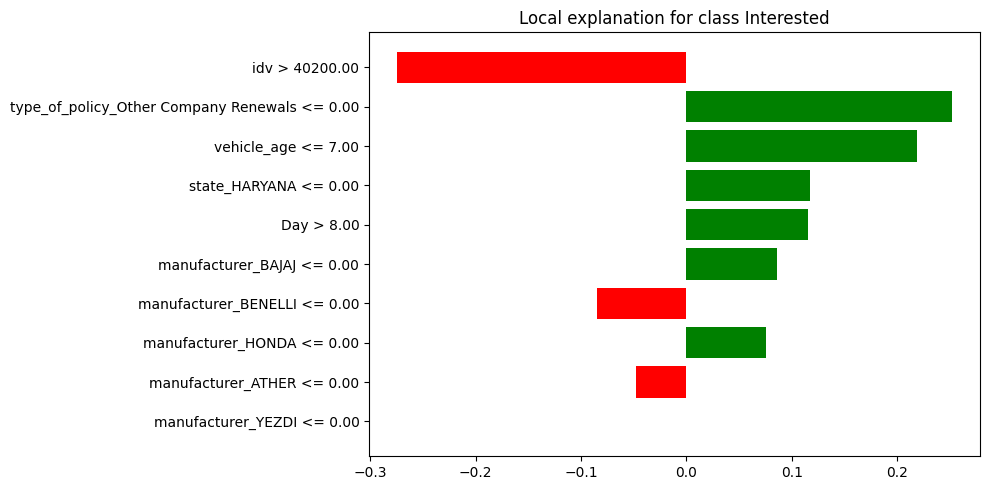

In [225]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Not Interested', 'Interested'],
    mode='classification'
)

# Pick an instance to explain
i = 3  # any test row index
exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=10)

fig = exp.as_pyplot_figure()
fig.set_size_inches(10, 5)
plt.tight_layout()
plt.show()


The LIME plot shown above provides a local explanation for a single prediction where the model classified the user as "Interested".

Green bars represent features that positively contributed to the model predicting the "Interested" class.

Red bars represent features that negatively contributed, i.e., they pushed the model away from predicting "Interested".

For this particular instance:

type_of_policy_Other Company Renewals, vehicle_age <= 7, and state_CHANDIGARH had strong positive contributions toward the prediction.

On the other hand, idv > 40200 and state_TRIPURA had negative impacts, pushing the prediction away from "Interested".

This local interpretability helps us understand which features influenced a single decision, making the model more explainable and trustworthy. Such visual diagnostics are crucial when deploying models in real-world applications like insurance where decision accountability matters. 

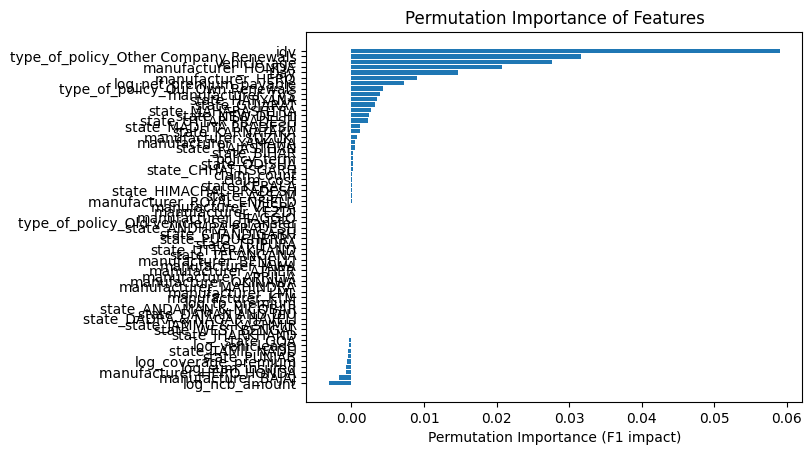

In [226]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, Y_test, n_repeats=10, scoring='f1', random_state=42)

# Plot
import matplotlib.pyplot as plt
import numpy as np

sorted_idx = result.importances_mean.argsort()
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.xlabel("Permutation Importance (F1 impact)")
plt.title("Permutation Importance of Features")
plt.show()


In [227]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", scores)
print("Mean F1 Score:", np.mean(scores))


Cross-Validation F1 Scores: [0.82484076 0.82108626 0.82932049 0.81939265 0.82302772]
Mean F1 Score: 0.8235335769892579


              precision    recall  f1-score   support

           0       0.41      0.42      0.42       431
           1       0.74      0.73      0.73       957

    accuracy                           0.64      1388
   macro avg       0.58      0.58      0.58      1388
weighted avg       0.64      0.64      0.64      1388



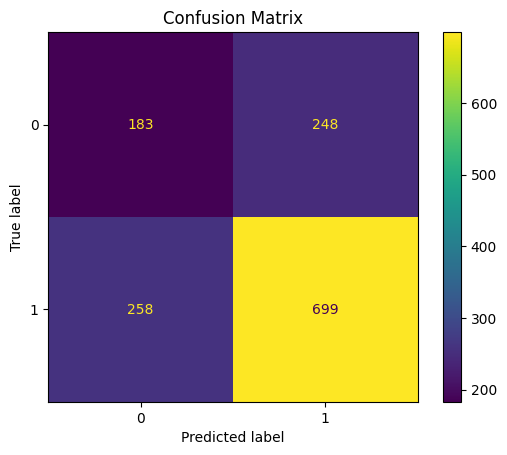

In [228]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
plt.title("Confusion Matrix")
plt.show()


In [229]:
import optuna
from sklearn.metrics import f1_score

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
    }

    model = XGBClassifier(**params)
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    return f1_score(Y_test, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best Hyperparameters:", study.best_params)


[I 2025-09-06 17:04:00,209] A new study created in memory with name: no-name-bd3fca19-6912-47d1-be8f-ded8d7b1da4c
[I 2025-09-06 17:04:00,379] Trial 0 finished with value: 0.8854519091348477 and parameters: {'max_depth': 6, 'learning_rate': 0.0352345402522923, 'n_estimators': 187, 'subsample': 0.5945392718835512, 'colsample_bytree': 0.5372324919135483, 'gamma': 3.770482261273514}. Best is trial 0 with value: 0.8854519091348477.
[I 2025-09-06 17:04:00,526] Trial 1 finished with value: 0.885024154589372 and parameters: {'max_depth': 9, 'learning_rate': 0.17074798517610779, 'n_estimators': 229, 'subsample': 0.8494973581116722, 'colsample_bytree': 0.50356302559155, 'gamma': 2.9991058012292457}. Best is trial 0 with value: 0.8854519091348477.
[I 2025-09-06 17:04:00,708] Trial 2 finished with value: 0.8826382153249273 and parameters: {'max_depth': 10, 'learning_rate': 0.08466800768491493, 'n_estimators': 213, 'subsample': 0.784860178490542, 'colsample_bytree': 0.8615619226346789, 'gamma': 2.3

Best Hyperparameters: {'max_depth': 3, 'learning_rate': 0.07949486443987452, 'n_estimators': 491, 'subsample': 0.9989455581300483, 'colsample_bytree': 0.6786704899216118, 'gamma': 4.82349690234433}


In [230]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

# Optional: If you tuned XGBoost earlier with Optuna
best_params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 200,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 1
}

# Define individual models
xgb_clf = XGBClassifier(**best_params)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
lr_clf = LogisticRegression(max_iter=1000)

# Create Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('xgb', xgb_clf),
    ('rf', rf_clf),
    ('lr', lr_clf)
], voting='soft')

# Train ensemble
voting_model.fit(X_train, Y_train)

# Predictions
y_pred = voting_model.predict(X_test)

# Evaluation
print("F1 Score:", f1_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))




F1 Score: 0.8826653790439402
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.42      0.42       431
           1       0.74      0.73      0.73       957

    accuracy                           0.64      1388
   macro avg       0.58      0.58      0.58      1388
weighted avg       0.64      0.64      0.64      1388



In [231]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define individual classifiers
clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', clf1), 
    ('rf', clf2), 
    ('xgb', clf3)
], voting='hard')  # You can try 'soft' too if you want probabilities

# Fit the model
voting_clf.fit(X_train, Y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.6354466858789626
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.42      0.42       431
           1       0.74      0.73      0.73       957

    accuracy                           0.64      1388
   macro avg       0.58      0.58      0.58      1388
weighted avg       0.64      0.64      0.64      1388

Confusion Matrix:
 [[183 248]
 [258 699]]


In [232]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_model, X_train, Y_train, cv=5, scoring='f1')
print("Voting Classifier CV F1 Scores:", scores)
print("Mean CV F1 Score:", scores.mean())

Voting Classifier CV F1 Scores: [0.88610614 0.88100962 0.88784498 0.89712919 0.87566924]
Mean CV F1 Score: 0.8855518335705875


In [233]:
import joblib

In [ ]:
# ==== SAVE TRAINED MODEL + TRAIN COLUMNS ====
import os, joblib
from sklearn.utils.validation import check_is_fitted

os.makedirs("models", exist_ok=True)

# Pick from the models that exist in your notebook.
# This will automatically select the first one that is fitted.
_candidates = ["voting_clf", "voting_model", "xgb_model", "rf", "model", "clf"]

final_name = None
final_model = None
for name in _candidates:
    if name in globals():
        mdl = globals()[name]
        try:
            check_is_fitted(mdl)    # works for most sklearn models
            final_name, final_model = name, mdl
            break
        except Exception:
            # Fallback: if it has predict, we still allow saving
            if hasattr(mdl, "predict"):
                final_name, final_model = name, mdl
                break

if final_model is None:
    raise RuntimeError("No trained model found among: " + ", ".join(_candidates))

# Save model
joblib.dump(final_model, "models/final_model.pkl")
joblib.dump(final_model, f"models/{final_name}.pkl")
print(f"✅ Saved: models/final_model.pkl (from variable: {final_name})")

# Save the exact training column order (assuming you built X for training earlier)
try:
    train_cols = list(X.columns)
    joblib.dump(train_cols, "models/train_columns.pkl")
    print(f"✅ Saved: models/train_columns.pkl with {len(train_cols)} columns")
except Exception as e:
    print("⚠️ Could not save train columns. Make sure X is your training feature DataFrame.")
    raise




✅ Saved: models/final_model.pkl (from variable: voting_clf)
✅ Saved: models/train_columns.pkl with 63 columns


In [235]:
import sys
print(sys.executable)


c:\Users\Aarush\OneDrive\Desktop\project folder\.venv\Scripts\python.exe


In [239]:
# ------------------------------
# FINAL TRAINING BLOCK (aligned with your notebook)
# ------------------------------

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib

# Define models (matching your notebook style)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(eval_metric="logloss", random_state=42)
svc = SVC(probability=True, random_state=42)  # must enable probabilities

# Create a soft voting classifier (so predict_proba works)
final_model = VotingClassifier(
    estimators=[
        ("lr", log_reg),
        ("rf", rf),
        ("xgb", xgb),
        ("svc", svc)
    ],
    voting="soft"
)

# Train the final model
final_model.fit(X_train, y_train)

# Evaluate
train_acc = final_model.score(X_train, y_train)
val_acc = final_model.score(X_val, y_val)

print(f"✅ Final model trained successfully!")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

# Save the model
joblib.dump(final_model, "models/final_model.pkl")

# Save the training feature columns
joblib.dump(X_train.columns.tolist(), "models/train_columns.pkl")

print("✅ Model and feature columns saved in /models/")


NameError: name 'y_train' is not defined

In [242]:
# ===== Robust final training + save cell (fixed) =====
import os, joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

g = globals()

# 1) Detect training data
X_train = g.get("X_train", None)
X_test  = g.get("X_test", None)
Y_train = g.get("Y_train", None)
Y_test  = g.get("Y_test", None)

if X_train is None or X_test is None or Y_train is None or Y_test is None:
    # try to use X and Y variables
    X_all = g.get("X", None) if g.get("X", None) is not None else g.get("x", None)
    Y_all = g.get("Y", None) if g.get("Y", None) is not None else g.get("y", None)

    if X_all is None or Y_all is None:
        raise RuntimeError(
            "Could not find training data. Ensure your notebook defines either:\n"
            "* X and Y (feature DataFrame and target Series) OR\n"
            "* X_train, X_test, Y_train, Y_test."
        )
    # create a fresh split
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.2, random_state=42)
    print("Created train/test split from X and Y.")

print("Train set shape:", getattr(X_train, "shape", None))
print("Test set shape :", getattr(X_test, "shape", None))

# 2) Build base estimators
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf      = RandomForestClassifier(n_estimators=200, random_state=42)
xgb     = XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42)
svc     = SVC(probability=True, random_state=42)

# 3) Voting (soft -> supports predict_proba)
final_model = VotingClassifier(
    estimators=[("lr", log_reg), ("rf", rf), ("xgb", xgb), ("svc", svc)],
    voting="soft"
)

# 4) Fit
print("Training final ensemble...")
final_model.fit(X_train, Y_train)
print("Training completed ✅")

# 5) Quick evaluation
y_pred = final_model.predict(X_test)
print("Validation accuracy:", accuracy_score(Y_test, y_pred))
print("Classification report:\n", classification_report(Y_test, y_pred))

# 6) Save model + training column order
os.makedirs("models", exist_ok=True)
joblib.dump(final_model, "models/final_model.pkl")
print("Saved model -> models/final_model.pkl")

if hasattr(X_train, "columns"):
    joblib.dump(list(X_train.columns), "models/train_columns.pkl")
    print(f"Saved training columns -> models/train_columns.pkl ({len(X_train.columns)} cols)")
else:
    print("Note: X_train has no 'columns' attribute; train_columns.pkl not saved.")

print("✅ All done. Now you can run your Streamlit app with this model.")



Train set shape: (5549, 63)
Test set shape : (1388, 63)
Training final ensemble...
Training completed ✅
Validation accuracy: 0.8242074927953891
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.50      0.64       431
           1       0.81      0.97      0.88       957

    accuracy                           0.82      1388
   macro avg       0.85      0.74      0.76      1388
weighted avg       0.83      0.82      0.81      1388

Saved model -> models/final_model.pkl
Saved training columns -> models/train_columns.pkl (63 cols)
✅ All done. Now you can run your Streamlit app with this model.


In [243]:
import os
print(os.getcwd())         # shows your working directory
print(os.listdir("models"))

c:\Users\Aarush\OneDrive\Desktop\project folder
['final_model.pkl', 'train_columns.pkl', 'voting_clf.pkl']
